# <b><div style='padding:15px; background-color:#003f88; color:white; text-align: center; border-radius:2px;font-size:110%;text-align: left'>Customer Churn Prediction</div></b>

### Problem Statement:
This Telecom Company faces the pressing need to address customer churn which poses a significant threat to its business sustainability and growth.
The company's current customer retention strategies lack precision and effectiveness, resulting in the loss of valuable customers to competitors.

### Aim:
To overcome this challenge, the company aims to develop a robust customer churn prediction system by leveraging advanced analytics and machine learning techniques on available customer data, the company seeks to accurately forecast customer churn and implement targeted retention initiatives.

This proactive approach will enable the company to reduce customer attrition, enhance customer loyalty, and maintain a competitive edge in the highly dynamic and competitive telecommunications industry.

In [6]:
#pip install missingno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno                
from collections import Counter 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Data Science Course\Capstone Project\Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#df[df['MultipleLines'] == 'No phone service']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   SeniorCitizen             7043 non-null   int64  
 3   Partner                   7043 non-null   object 
 4   Dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   PhoneService              7043 non-null   object 
 7   MultipleLines             7043 non-null   object 
 8   InternetService           7043 non-null   object 
 9   OnlineSecurity            7043 non-null   object 
 10  OnlineBackup              7043 non-null   object 
 11  DeviceProtection          7043 non-null   object 
 12  TechSupport               7043 non-null   object 
 13  StreamingTV               7043 non-null   object 
 14  Streamin

##### **Observations**
- Total Charges is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [8]:
df.shape

(7043, 23)

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Senior_Citizen', 'Monthly_Subscribers_Plan'],
      dtype='object')

In [10]:
# To convert ToatalChargies from object to float64
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID                   0
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
InternetService              0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             0
PaymentMethod                0
MonthlyCharges               0
TotalCharges                11
Churn                        0
Senior_Citizen               0
Monthly_Subscribers_Plan     0
dtype: int64

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.describe(exclude = ['int64', 'float64'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Senior_Citizen,Monthly_Subscribers_Plan
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,2,3
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,Medium Plan (<=88.26)
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,5901,2652


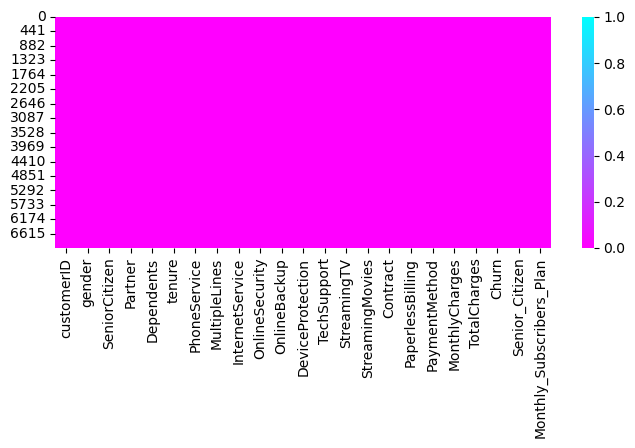

In [13]:
# To visualize the missing data

plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), cbar=True, cmap="cool_r");

<Axes: >

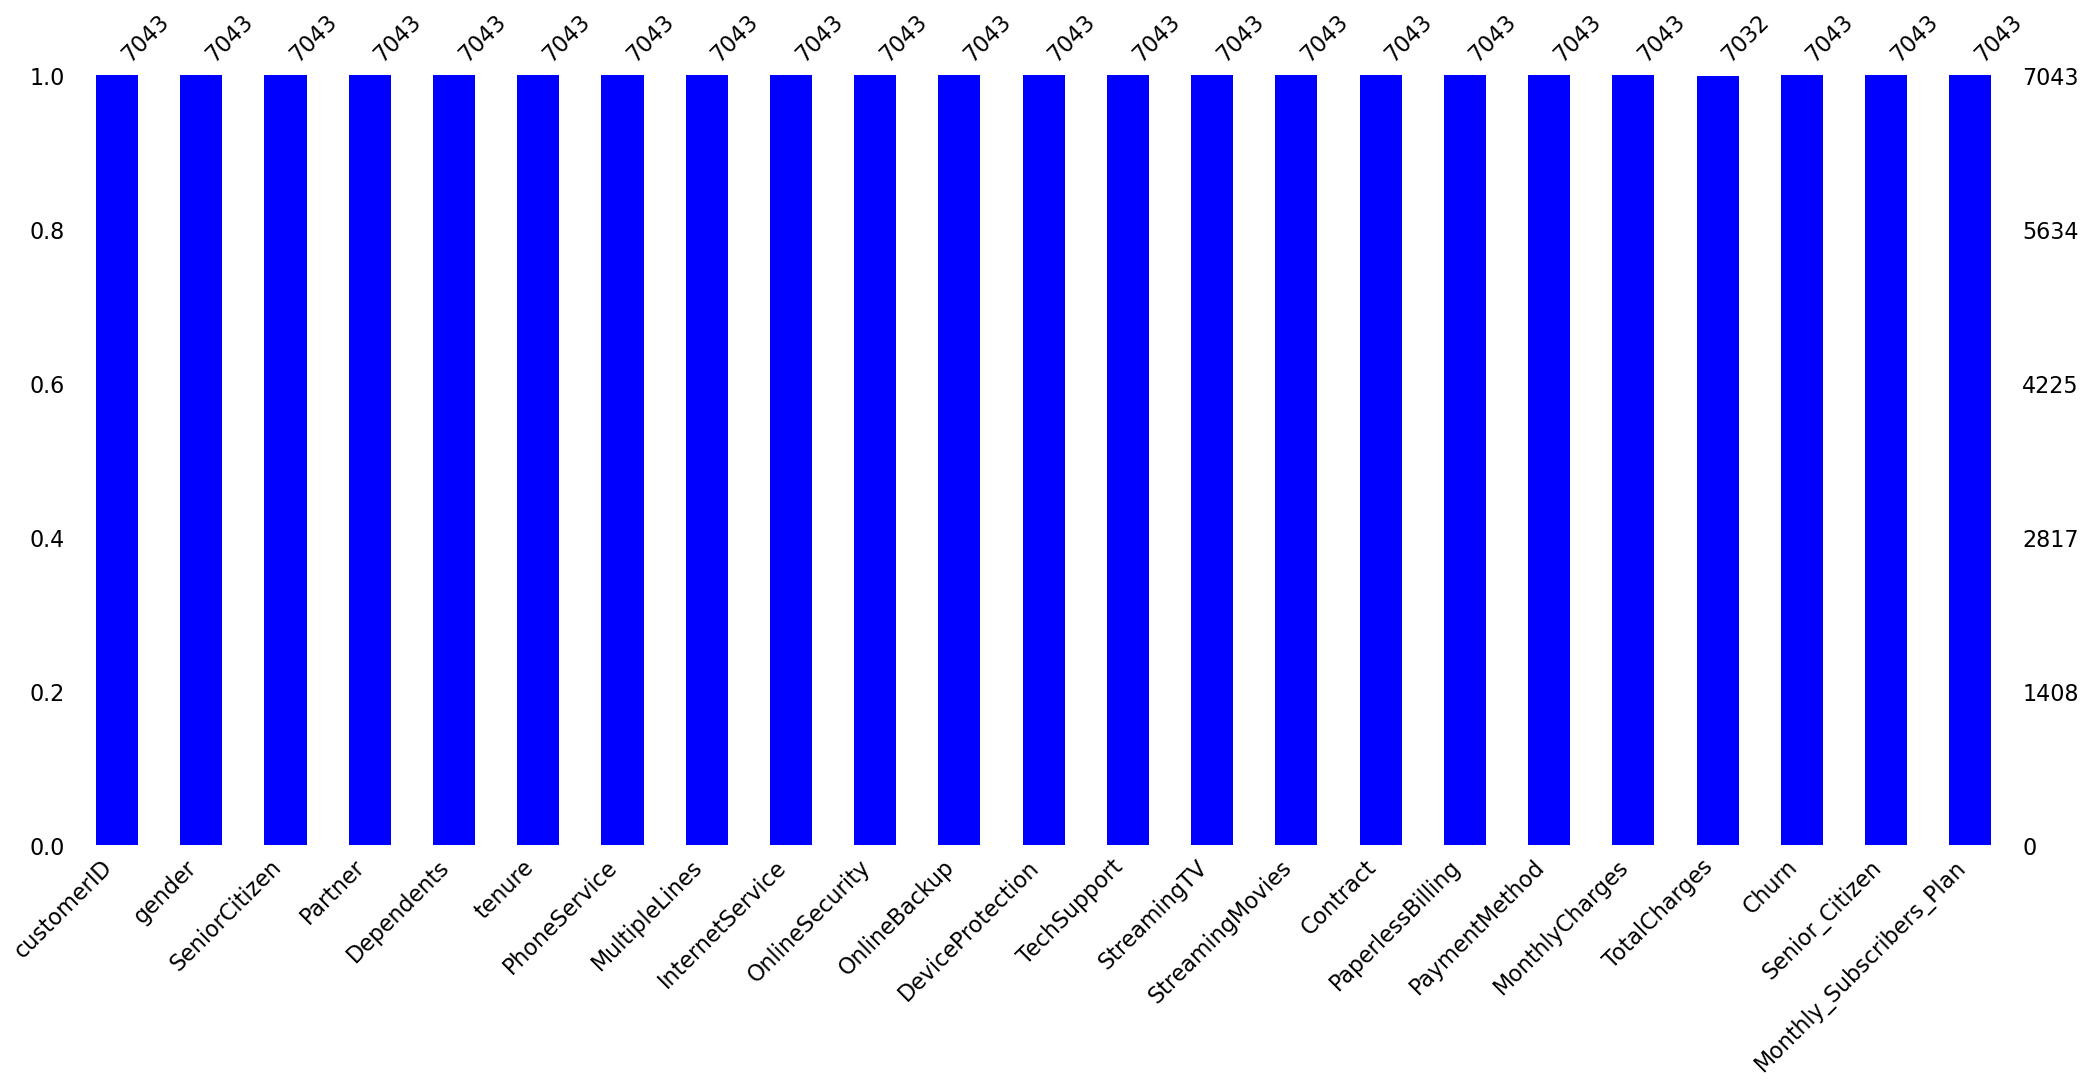

In [14]:
# To visualize the missing data using the msno (missingno)

msno.bar(df, color = "blue")

In [15]:
# To display where there is missing data in the dataset
df[df.isnull().any(axis = 1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Senior_Citizen,Monthly_Subscribers_Plan
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,No,Medium Plan (<=88.26)
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,No,low Plan (<=51.75)
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,No,Medium Plan (<=88.26)
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,No,low Plan (<=51.75)
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,No,Medium Plan (<=88.26)
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,No,low Plan (<=51.75)
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,No,low Plan (<=51.75)
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,No,low Plan (<=51.75)
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,No,low Plan (<=51.75)
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,NaN,No,No,Medium Plan (<=88.26)


In [16]:
# To drop(delete) the row with the missing data

df.dropna(inplace = True)
df.isnull().sum()

customerID                  0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0
Senior_Citizen              0
Monthly_Subscribers_Plan    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7032 non-null   object 
 1   gender                    7032 non-null   object 
 2   SeniorCitizen             7032 non-null   int64  
 3   Partner                   7032 non-null   object 
 4   Dependents                7032 non-null   object 
 5   tenure                    7032 non-null   int64  
 6   PhoneService              7032 non-null   object 
 7   MultipleLines             7032 non-null   object 
 8   InternetService           7032 non-null   object 
 9   OnlineSecurity            7032 non-null   object 
 10  OnlineBackup              7032 non-null   object 
 11  DeviceProtection          7032 non-null   object 
 12  TechSupport               7032 non-null   object 
 13  StreamingTV               7032 non-null   object 
 14  StreamingMovi

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df.describe(exclude = ['int64', 'float64'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Senior_Citizen,Monthly_Subscribers_Plan
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,2,3
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,Medium Plan (<=88.26)
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163,5890,2647


## Univariate Analysis

#### Categorical Data Visualization


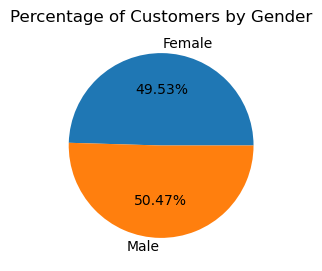

In [20]:
# Total Transaction by Customer Gender

fig,ax = plt.subplots(figsize = (3,3))
count = Counter(df['gender'])
ax.pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Customers by Gender')
plt.show()

##### **Observations**
- The company has a little bit of more male customers than female customers

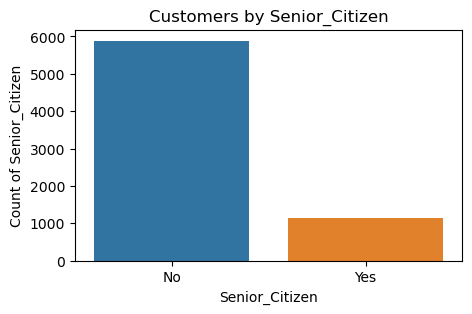

In [21]:
# Data Visualization
# Senior Citizen

def Senior_Citizen(SeniorCitizen):
    if SeniorCitizen == 1:
        return "Yes"
    else:
        return "No"
    
df['Senior_Citizen'] = df['SeniorCitizen'].apply(Senior_Citizen)

# Investigating the distribution of patient across gender
plt.figure(figsize = (5,3))
sns.countplot(x = 'Senior_Citizen', data = df)
plt.xlabel('Senior_Citizen')
plt.ylabel('Count of Senior_Citizen')
plt.title('Customers by Senior_Citizen');

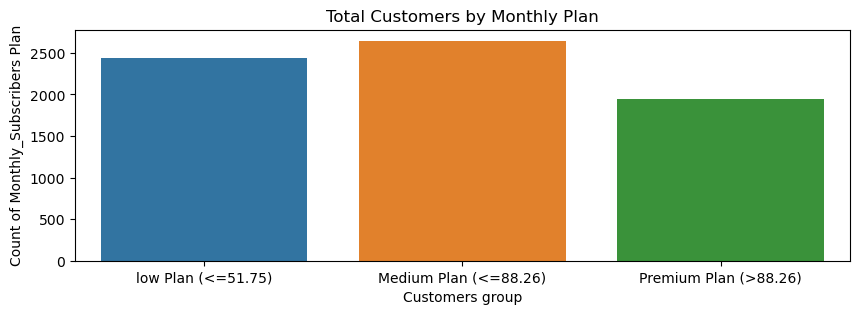

In [22]:
# MonthlyCharge bracket

def Monthly_Subscribers_Plan(MonthlyCharges):
    if MonthlyCharges <= 51.75:
            return "low Plan (<=51.75)"
    elif MonthlyCharges <= 88.26:
        return "Medium Plan (<=88.26)"
    else:
        return "Premium Plan (>88.26)"
    
df['Monthly_Subscribers_Plan'] = df['MonthlyCharges'].apply(Monthly_Subscribers_Plan)


plt.figure(figsize = (10,3))
sns.countplot(x = 'Monthly_Subscribers_Plan', data = df)
plt.xlabel('Customers group')
plt.ylabel('Count of Monthly_Subscribers Plan')
plt.title('Total Customers by Monthly Plan');


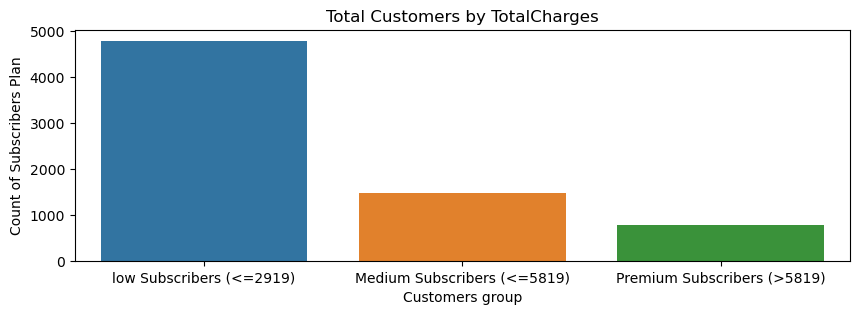

In [23]:
# TotalCharges bracket

def Subscribers_Plan(TotalCharges):
    if TotalCharges <= 2919:
            return "low Subscribers (<=2919)"
    elif TotalCharges <= 5819:
        return "Medium Subscribers (<=5819)"
    else:
        return "Premium Subscribers (>5819)"
    
df['Subscribers_Plan'] = df['TotalCharges'].apply(Subscribers_Plan)

plt.figure(figsize = (10,3))
sns.countplot(x = 'Subscribers_Plan', data = df)
plt.xlabel('Customers group')
plt.ylabel('Count of Subscribers Plan')
plt.title('Total Customers by TotalCharges');

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Senior_Citizen,Monthly_Subscribers_Plan,Subscribers_Plan
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No,low Plan (<=51.75),low Subscribers (<=2919)
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,No,Medium Plan (<=88.26),low Subscribers (<=2919)
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,Medium Plan (<=88.26),low Subscribers (<=2919)
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No,low Plan (<=51.75),low Subscribers (<=2919)
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Medium Plan (<=88.26),low Subscribers (<=2919)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7032 non-null   object 
 1   gender                    7032 non-null   object 
 2   SeniorCitizen             7032 non-null   int64  
 3   Partner                   7032 non-null   object 
 4   Dependents                7032 non-null   object 
 5   tenure                    7032 non-null   int64  
 6   PhoneService              7032 non-null   object 
 7   MultipleLines             7032 non-null   object 
 8   InternetService           7032 non-null   object 
 9   OnlineSecurity            7032 non-null   object 
 10  OnlineBackup              7032 non-null   object 
 11  DeviceProtection          7032 non-null   object 
 12  TechSupport               7032 non-null   object 
 13  StreamingTV               7032 non-null   object 
 14  StreamingMovi

In [26]:
mon_rev = df.groupby('Monthly_Subscribers_Plan')['MonthlyCharges'].sum().reset_index()
mon_rev

,Monthly_Subscribers_Plan,MonthlyCharges
0,Medium Plan (<=88.26),191272.20
1,Premium Plan (>88.26),193625.25
2,low Plan (<=51.75),70763.55


In [27]:
total_rev = df.groupby('Subscribers_Plan')['TotalCharges'].sum().reset_index()
total_rev

,Subscribers_Plan,TotalCharges
0,Medium Subscribers (<=5819),6333371.0
1,Premium Subscribers (>5819),5351191.4
2,low Subscribers (<=2919),4371606.3


  Monthly_Subscribers_Plan  MonthlyCharges
0    Medium Plan (<=88.26)       191272.20
1    Premium Plan (>88.26)       193625.25
2       low Plan (<=51.75)        70763.55
              Subscribers_Plan  TotalCharges
0  Medium Subscribers (<=5819)     6333371.0
1  Premium Subscribers (>5819)     5351191.4
2     low Subscribers (<=2919)     4371606.3


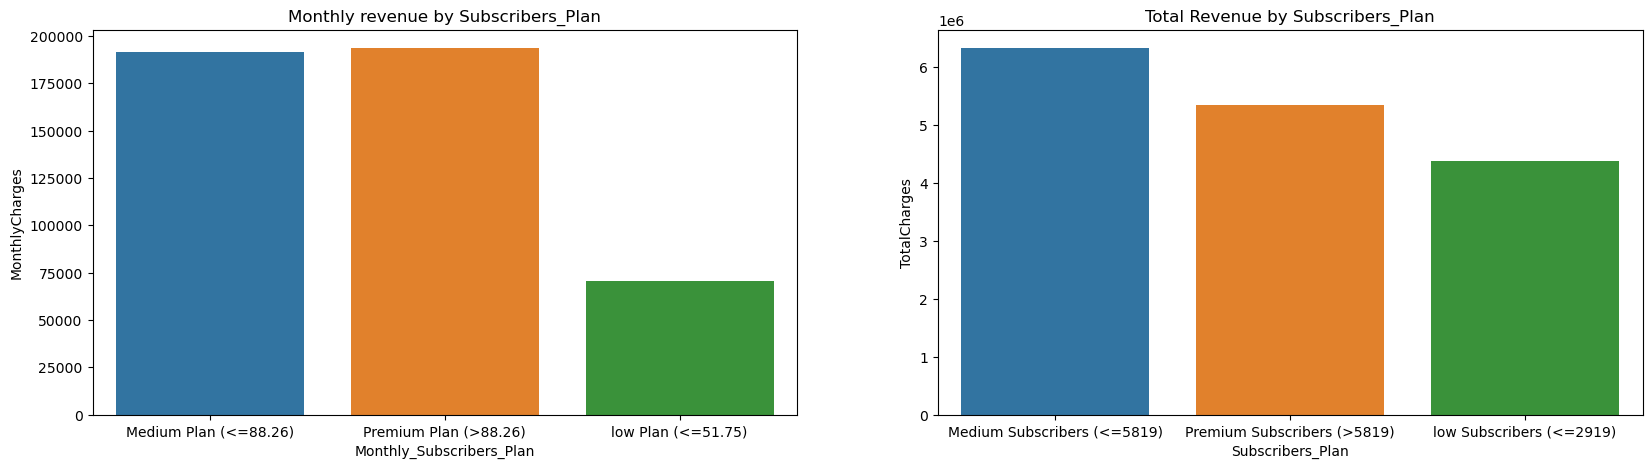

In [44]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

# Total Profit by Customer type
mon_rev= df.groupby('Monthly_Subscribers_Plan')['MonthlyCharges'].sum().reset_index()
sns.barplot(x = 'Monthly_Subscribers_Plan', data = mon_rev, y = 'MonthlyCharges', ax = axs[0])
axs[0].set_title('Monthly revenue by Subscribers_Plan')

# Total Profit by Sales Person
total_rev = df.groupby('Subscribers_Plan')['TotalCharges'].sum().reset_index()
sns.barplot(x = 'Subscribers_Plan', data = total_rev, y = 'TotalCharges', ax = axs[1])
axs[1].set_title('Total Revenue by Subscribers_Plan')

print(mon_rev) 
print(total_rev)


##### **Obsercations**
- In terms of Monthly Chargies, Premium plan generate most revenue  with about 193,625.25 followed by Medium plan with about 191,272.20 and the Low Plan with about 70,763.55
- In terms of Total Chargies, Medium plan generate most revenue  with about 6,333,371.0 followed by Premium plan with about 5,351,191.4 and the Low Subscribers with about 4,371,606.3

##### Group 1 : Customer Bio-Data : 
#### gender | Senior_Citizen | Partner | Dependents |

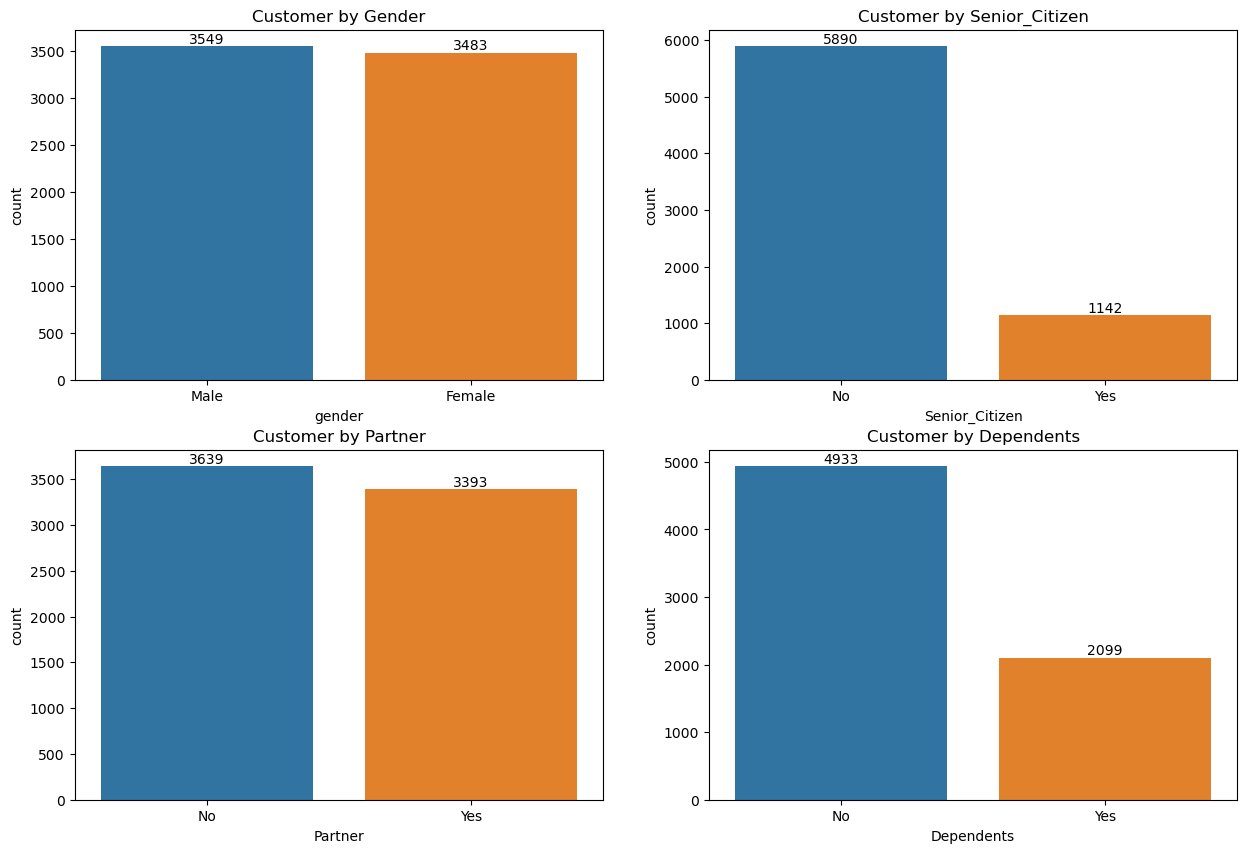

In [24]:
fig, axs = plt.subplots(2,2, figsize = (15,10))


ax = sns.countplot(x = df['gender'], ax = axs[0,0], order = df['gender'].value_counts(ascending = False).index)
values = df['gender'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values)
axs[0,0].set_title('Customer by Gender')

ax = sns.countplot(x = df['Senior_Citizen'], ax = axs[0,1], order = df['Senior_Citizen'].value_counts(ascending = False).index)
values = df['Senior_Citizen'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values)
axs[0,1].set_title('Customer by Senior_Citizen')

ax = sns.countplot(x = df['Partner'], ax = axs[1,0], order = df['Partner'].value_counts(ascending = False).index)
values = df['Partner'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values)
axs[1,0].set_title('Customer by Partner')

ax = sns.countplot(x = df['Dependents'], ax = axs[1,1], order = df['Dependents'].value_counts(ascending = False).index)
values = df['Dependents'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values)
axs[1,1].set_title('Customer by Dependents');





##### **Observations**
- Customers distribution are almost equal across both genders.
- Majority of the customers are not senior citizens.
- More customers have no-partner.
- Majority of the customers are no dependents.


#### Group 2.1: Services Subscribed by the Customer :
- For visualization purposes, we will create 2 groups!
##### PhoneService | MultipleLines | InternetService |

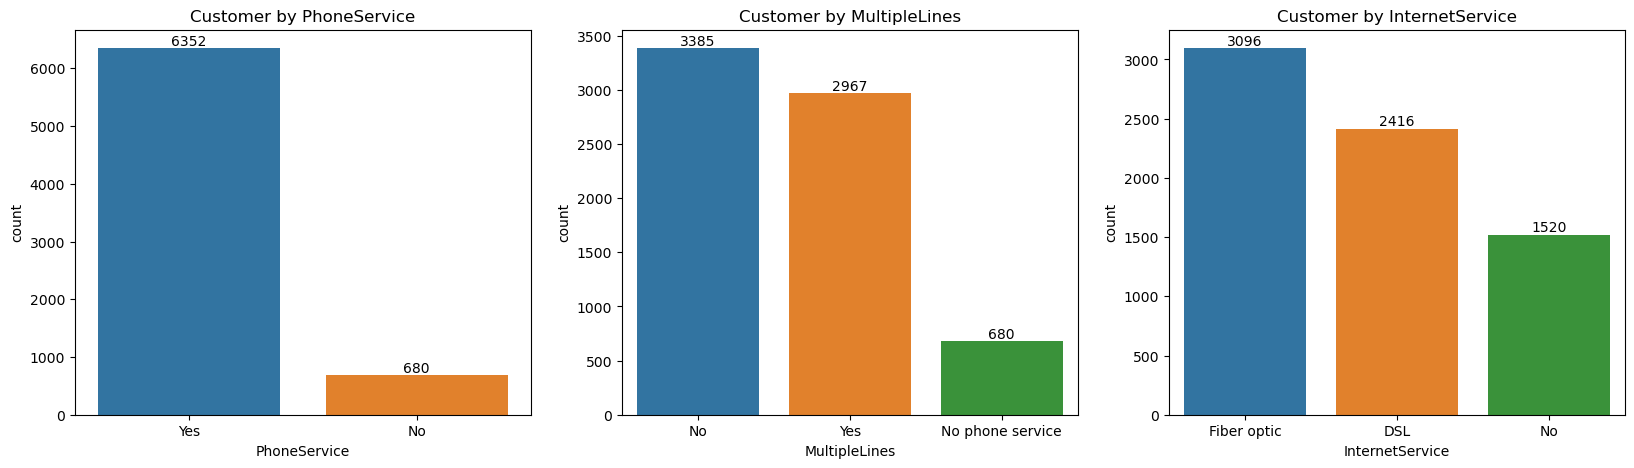

In [25]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

ax = sns.countplot(x = df['PhoneService'], ax = axs[0], order = df['PhoneService'].value_counts(ascending = False).index)
values = df['PhoneService'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values)
axs[0].set_title('Customer by PhoneService')

ax = sns.countplot(x = df['MultipleLines'], ax = axs[1], order = df['MultipleLines'].value_counts(ascending = False).index)
values = df['MultipleLines'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values)
axs[1].set_title('Customer by MultipleLines')

ax = sns.countplot(x = df['InternetService'], ax = axs[2], order = df['InternetService'].value_counts(ascending = False).index)
values = df['InternetService'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values)
axs[2].set_title('Customer by InternetService');



##### **Observations**
- Majority of the customers have access to phones  services
- Almost half of the customers don't have multiple line
- More than half of the customers who have access to Internet Service prefer Fiber Optic

##### Group 2.2: Services Subscribed by the Customer :
- For visualization purposes, we will create 3 groups!

##### StreamingTV | StreamingMovies |

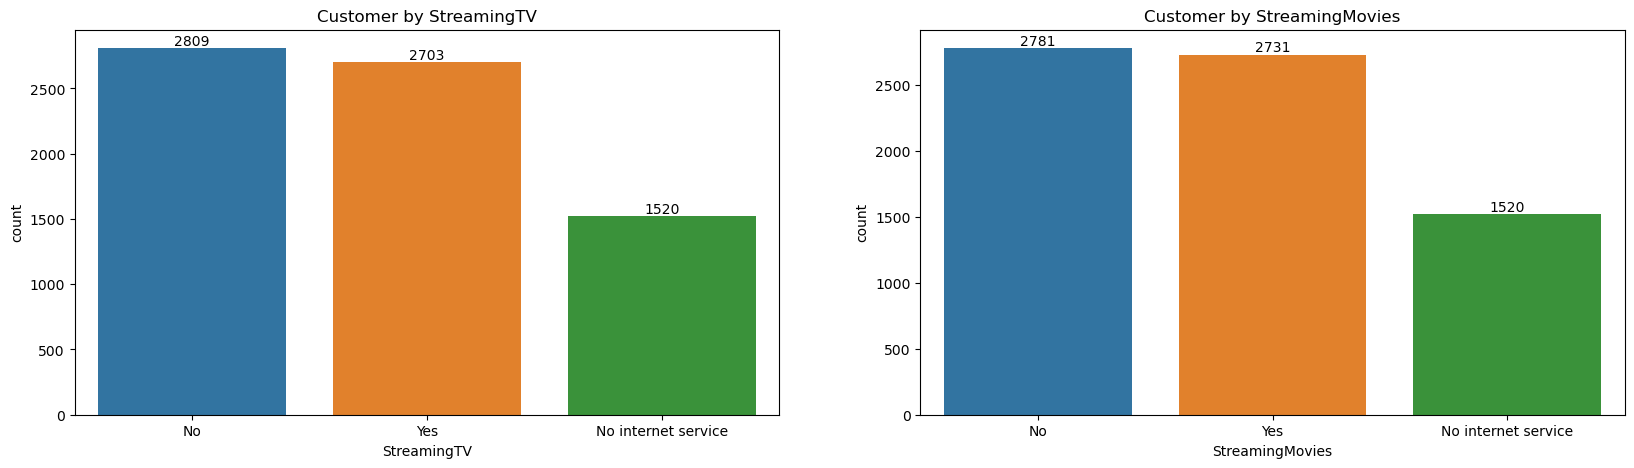

In [26]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

ax = sns.countplot(x = df['StreamingTV'], ax = axs[0], order = df['StreamingTV'].value_counts(ascending = False).index)
values = df['StreamingTV'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values)
axs[0].set_title('Customer by StreamingTV')

ax = sns.countplot(x = df['StreamingMovies'], ax = axs[1], order = df['StreamingMovies'].value_counts(ascending = False).index)
values = df['StreamingMovies'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[1].set_title('Customer by StreamingMovies');

##### **Observations**
- Almost equal number of customers have access/no aceess to Streaming TV and Streaming Movies

#### Group 3: Services Subscribed by the Customer (Customers Security) :
- For visualization purposes, we will create 2 groups!
##### OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

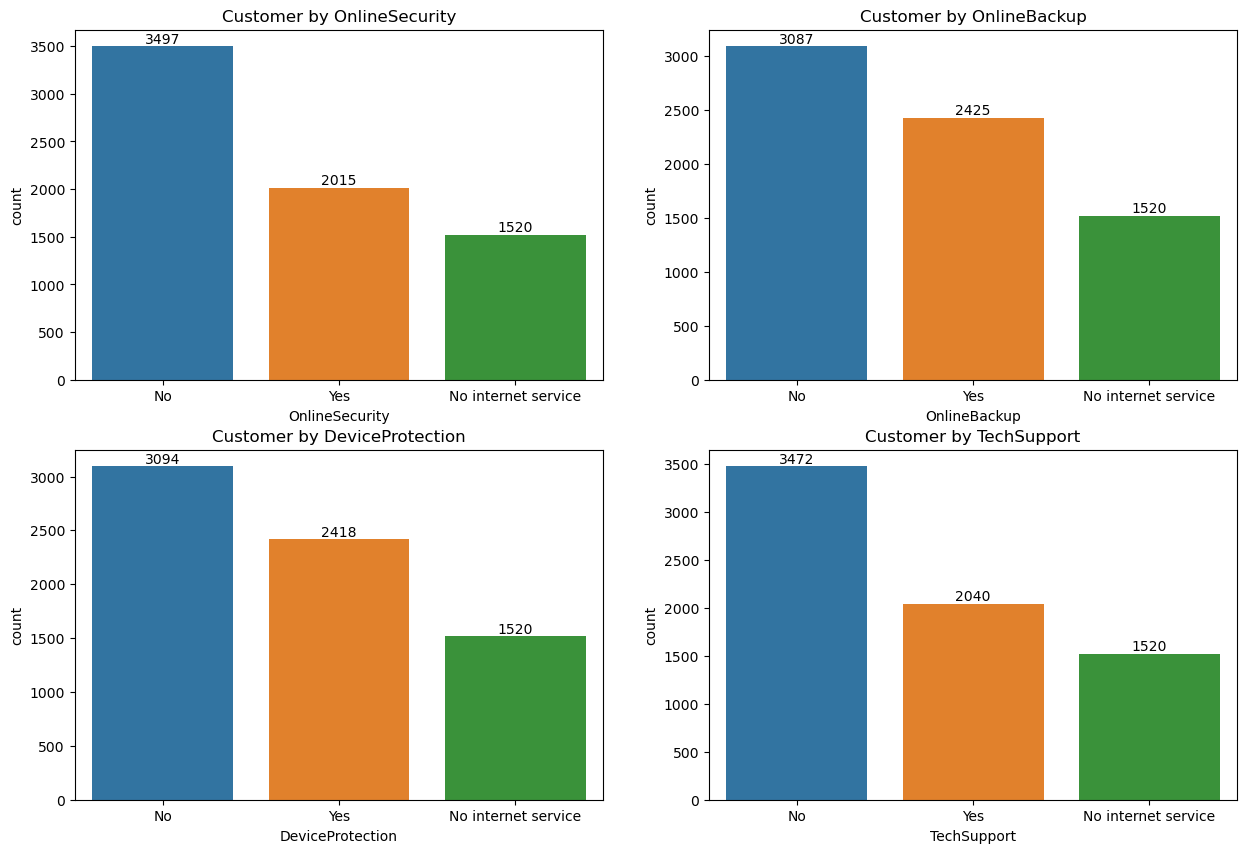

In [27]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

ax = sns.countplot(x = df['OnlineSecurity'], ax = axs[0,0], order = df['OnlineSecurity'].value_counts(ascending = False).index)
values = df['OnlineSecurity'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[0,0].set_title('Customer by OnlineSecurity')

ax = sns.countplot(x = df['OnlineBackup'], ax = axs[0,1], order = df['OnlineBackup'].value_counts(ascending = False).index)
values = df['OnlineBackup'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[0,1].set_title('Customer by OnlineBackup')

ax = sns.countplot(x = df['DeviceProtection'], ax = axs[1,0], order = df['DeviceProtection'].value_counts(ascending = False).index)
values = df['DeviceProtection'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[1,0].set_title('Customer by DeviceProtection')

ax = sns.countplot(x = df['TechSupport'], ax = axs[1,1], order = df['TechSupport'].value_counts(ascending = False).index)
values = df['TechSupport'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[1,1].set_title('Customer by TechSupport');


##### **Observations**
- Almost half of the customer don't have access to Online security
- A good number of customers don't have online backup, Device Protection and Tech Support

#### Group 4 : Contract | PaperlessBilling | PaymentMethod |

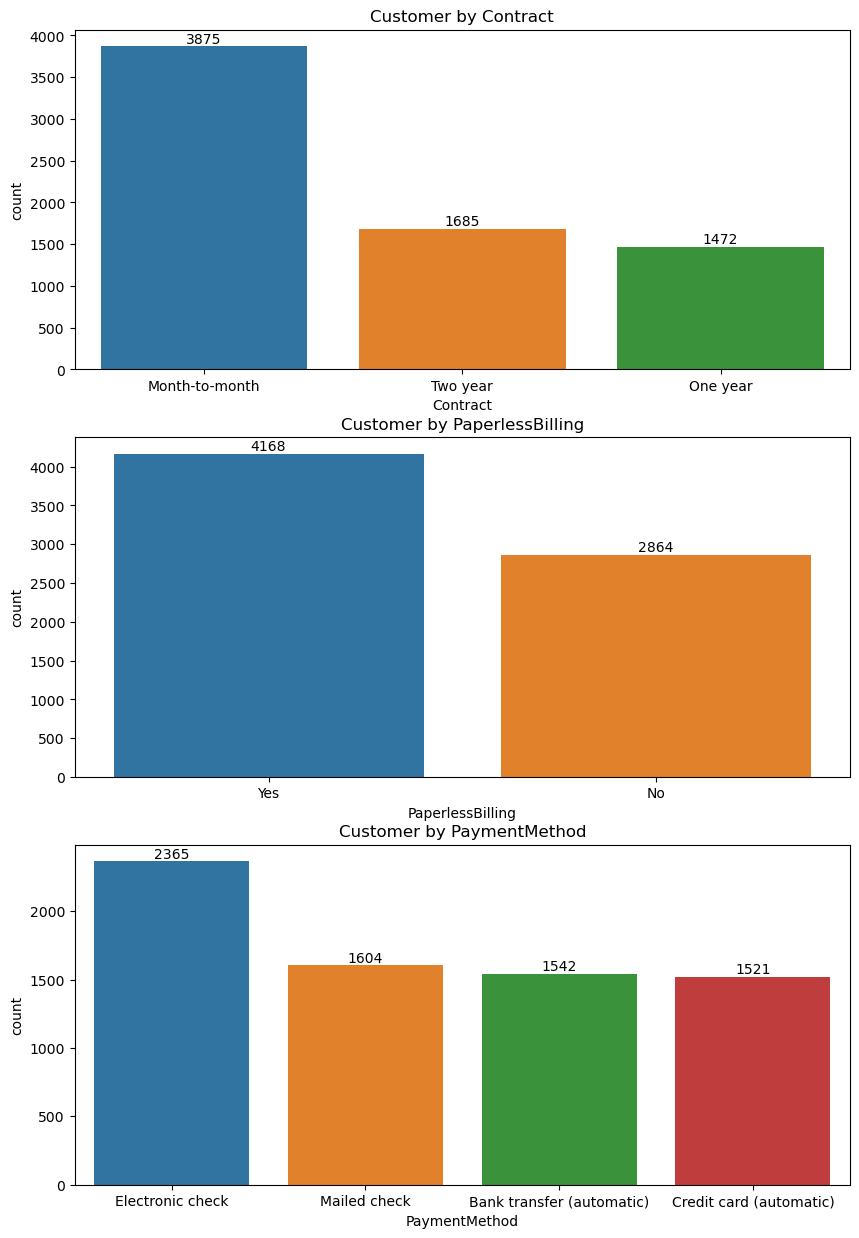

In [28]:
fig, axs = plt.subplots(3,1, figsize = (10,15))

ax = sns.countplot(x = df['Contract'], ax = axs[0], order = df['Contract'].value_counts(ascending = False).index)
values = df['Contract'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[0].set_title('Customer by Contract')

ax = sns.countplot(x = df['PaperlessBilling'], ax = axs[1], order = df['PaperlessBilling'].value_counts(ascending = False).index)
values = df['PaperlessBilling'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[1].set_title('Customer by PaperlessBilling')

ax = sns.countplot(x = df['PaymentMethod'], ax = axs[2], order = df['PaymentMethod'].value_counts(ascending = False).index)
values = df['PaymentMethod'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[2].set_title('Customer by PaymentMethod');




##### **Observations**
- Majority of customers prefer month-to-month contract.
- Majority of customers prefer paperless billing.
- Electronic Check is the mode preferred mode of payment.

#### Group 5 : MonthlyChargies | TotalChargies |

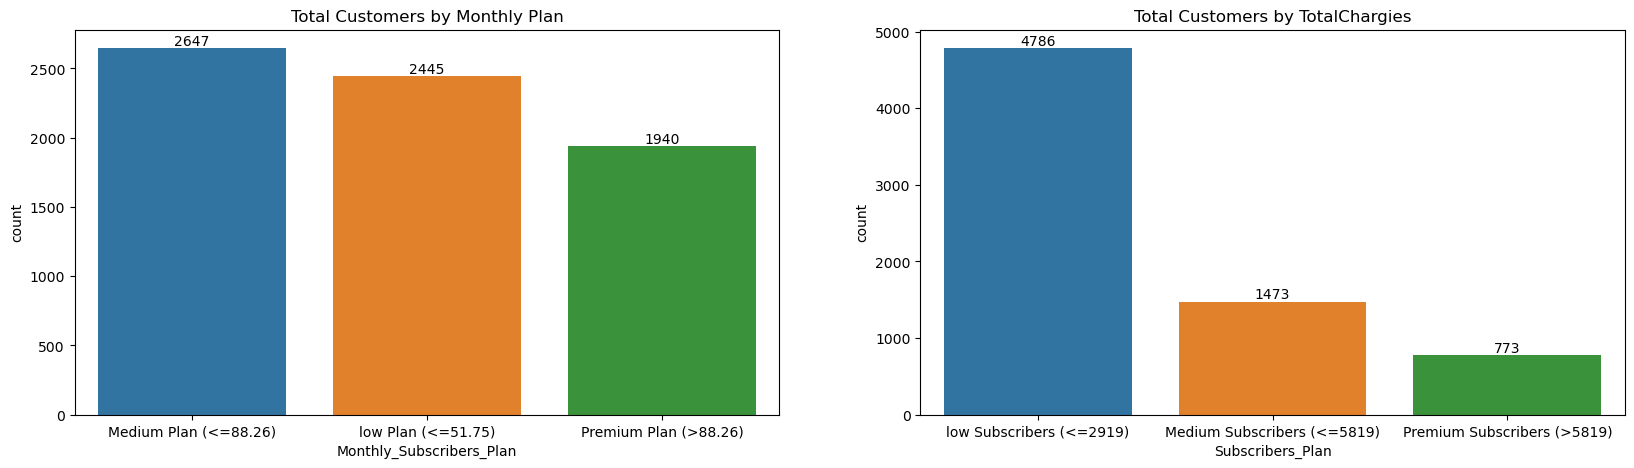

In [29]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

ax = sns.countplot(x = df['Monthly_Subscribers_Plan'], ax = axs[0], order = df['Monthly_Subscribers_Plan'].value_counts(ascending = False).index)
values = df['Monthly_Subscribers_Plan'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[0].set_title('Total Customers by Monthly Plan');

ax = sns.countplot(x = df['Subscribers_Plan'], ax = axs[1], order = df['Subscribers_Plan'].value_counts(ascending = False).index)
values = df['Subscribers_Plan'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
axs[1].set_title('Total Customers by TotalChargies');

##### **Observations**
- More customers subscribe to medium plan monthly, followed closely by low plan and then premium plan
- In terms of total chargies, most customers are in the lower plan bracket. This might be due to the high cost of being a medium and premium subscriber.

##### Group 6 : Churn

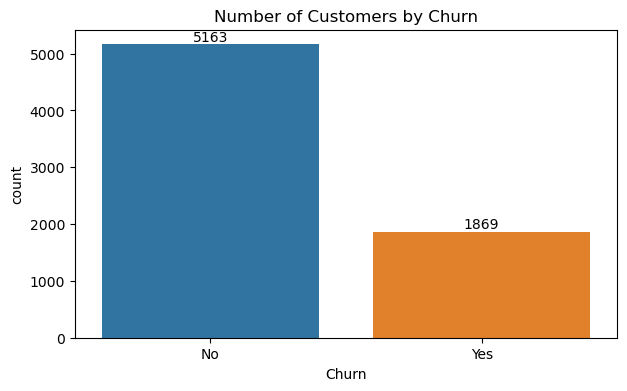

In [30]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x = df['Churn'], order = df['Churn'].value_counts(ascending = False).index)
values = df['Churn'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);
plt.title('Number of Customers by Churn');

##### **Observation**
- Majority of the customers still has some form of subscription with the company
- The dataset is **unbalanced** close **3 : 1** ratio for **Not-Churn : Churn** customers, due to this, predictions will be biased towards **Not-Churn** customers (No).

### Numerical Visualization

Text(0.5, 1.0, 'Boxplot on tenure')

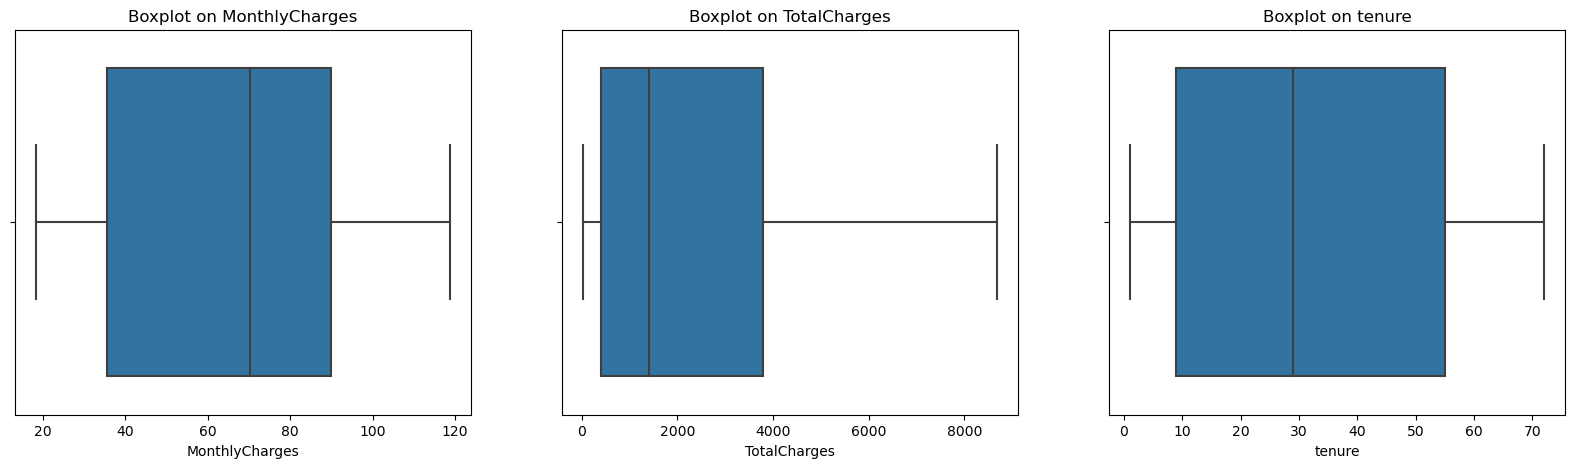

In [31]:
# Boxplot on MonthlyCharges, TotalCharges, tenure

fig, axs = plt.subplots(1,3, figsize = (20,5))

sns.boxplot(x = 'MonthlyCharges', data = df, ax = axs[0])
axs[0].set_title('Boxplot on MonthlyCharges')

sns.boxplot(x = 'TotalCharges', data = df, ax = axs[1])
axs[1].set_title('Boxplot on TotalCharges')

sns.boxplot(x = 'tenure', data = df, ax = axs[2])
axs[2].set_title('Boxplot on tenure')

##### **Observations**
- There are no outliers in TotalCharges, MonthlyChargies and Tenure

Text(0.5, 1.0, 'Boxplot on tenure')

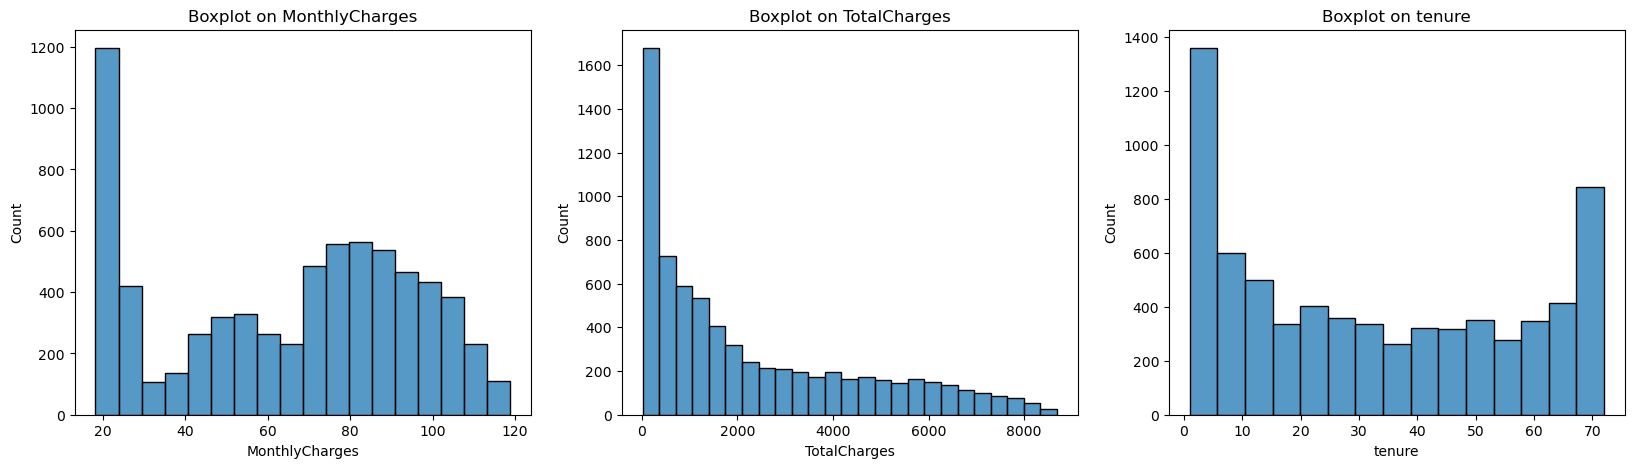

In [32]:
# Histogram on MonthlyCharges, TotalCharges, tenure

fig, axs = plt.subplots(1,3, figsize = (20,5))

sns.histplot(x = 'MonthlyCharges', data = df, ax = axs[0])
axs[0].set_title('Boxplot on MonthlyCharges')

sns.histplot(x = 'TotalCharges', data = df, ax = axs[1])
axs[1].set_title('Boxplot on TotalCharges')

sns.histplot(x = 'tenure', data = df, ax = axs[2])
axs[2].set_title('Boxplot on tenure')

## Bivariate Analysis

### Categorical Features vs Target Variable (Churn):

##### Group 1 : Customer Bio-Data : 
#### gender | SeniorCitizen | Partner | Dependents |

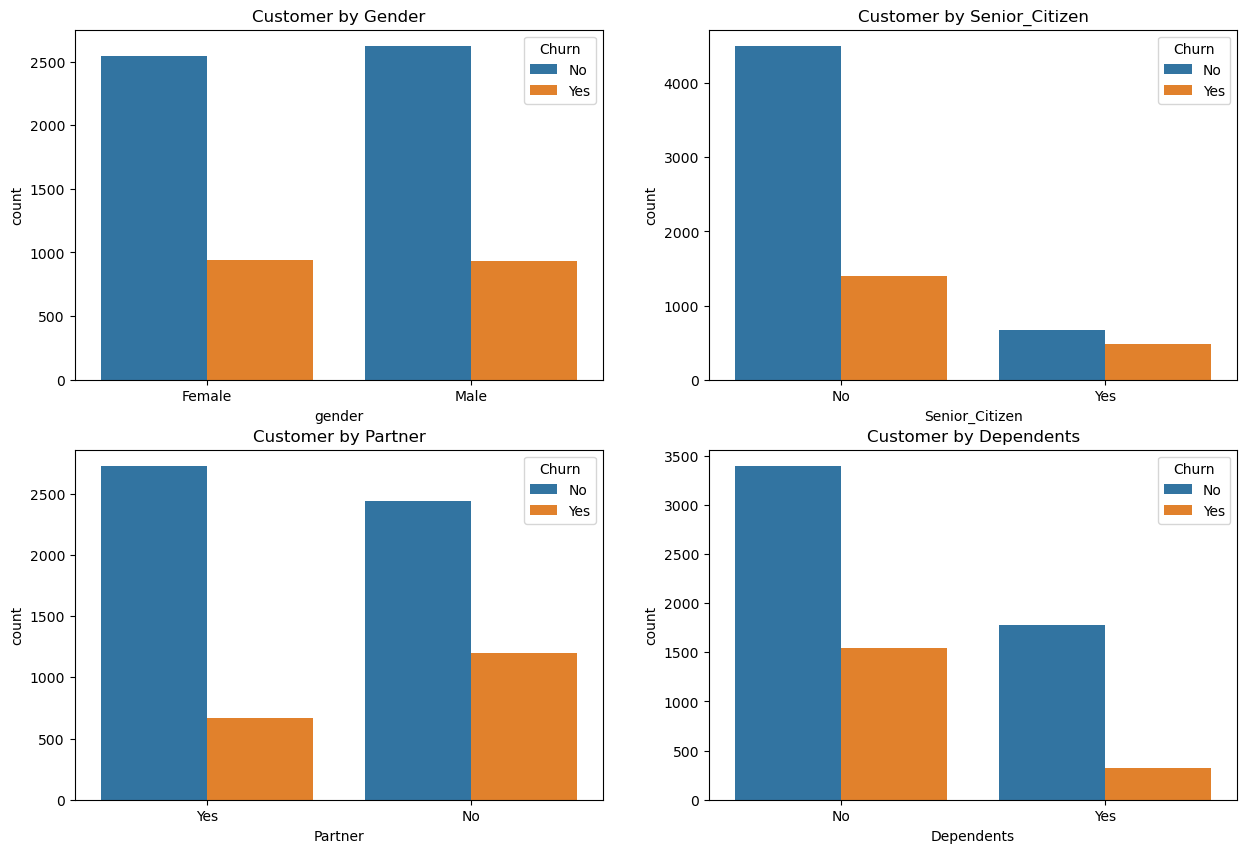

In [33]:
fig, axs = plt.subplots(2,2, figsize = (15,10))


ax = sns.countplot(x = df['gender'], hue = df['Churn'], ax = axs[0,0])
axs[0,0].set_title('Customer by Gender')

ax = sns.countplot(x = df['Senior_Citizen'], hue = df['Churn'], ax = axs[0,1])
axs[0,1].set_title('Customer by Senior_Citizen')

ax = sns.countplot(x = df['Partner'], hue = df['Churn'], ax = axs[1,0])
axs[1,0].set_title('Customer by Partner')

ax = sns.countplot(x = df['Dependents'], hue = df['Churn'], ax = axs[1,1],)
axs[1,1].set_title('Customer by Dependents');

##### **Obdervations**
- For both gender category, we have almost the same amount of customesr that have churned and not churned.
- Customers who are senior citizens have churned more relative to their total number
- Customers without partners have the highest churn rate compared to people with partners.
- Customers without Dependents have the highest churn rate.

##### Group 2.1: Services Subscribed by the Customer :
- For visualization purposes, we will create 2 groups!
##### PhoneService | MultipleLines | InternetService |

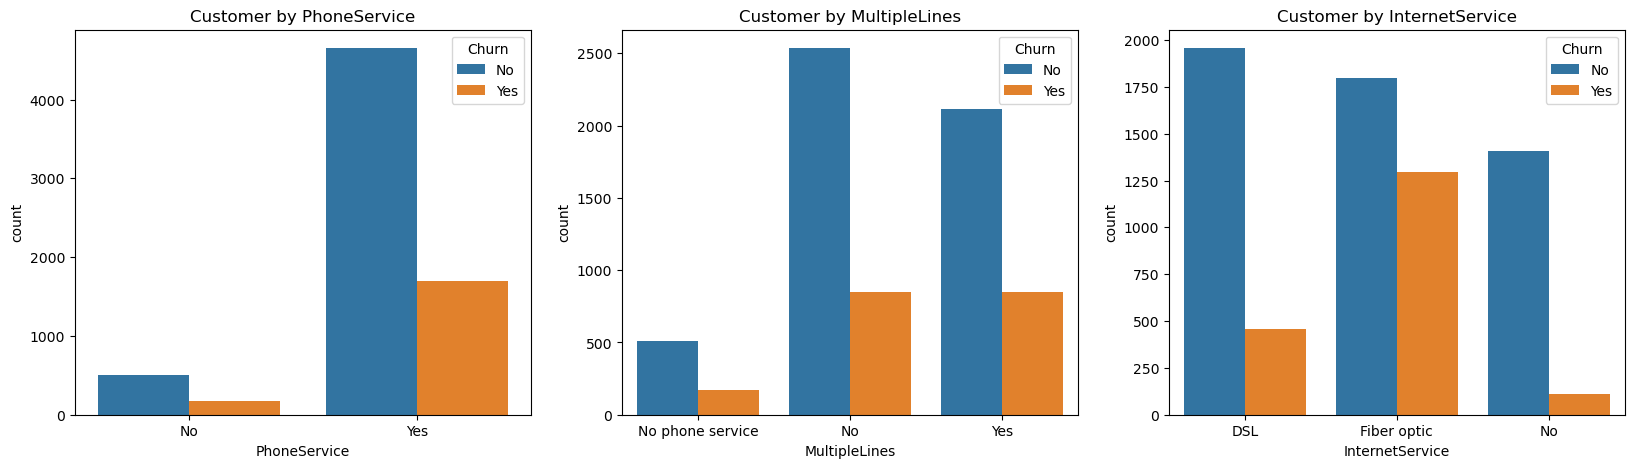

In [34]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

ax = sns.countplot(x = df['PhoneService'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('Customer by PhoneService')

ax = sns.countplot(x = df['MultipleLines'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('Customer by MultipleLines')

ax = sns.countplot(x = df['InternetService'], hue = df['Churn'], ax = axs[2])
axs[2].set_title('Customer by InternetService');

##### **Observations**
- Majority of the customers have access to phone, as a result, they have more churned customers.
- There are more customers without multiplelines than those with multiplelines and their churn rate is almost same.
- A high number of customers have dissatisfaction towards the use of **Fiber optic** cables for providing 
the **InternetService**. On the contrary, from the above graph, customers prefer using **DSL** for their **InternetService**!

##### Group 2.2: Services Subscribed by the Customer :
- For visualization purposes, we will create 3 groups!

##### StreamingTV | StreamingMovies |

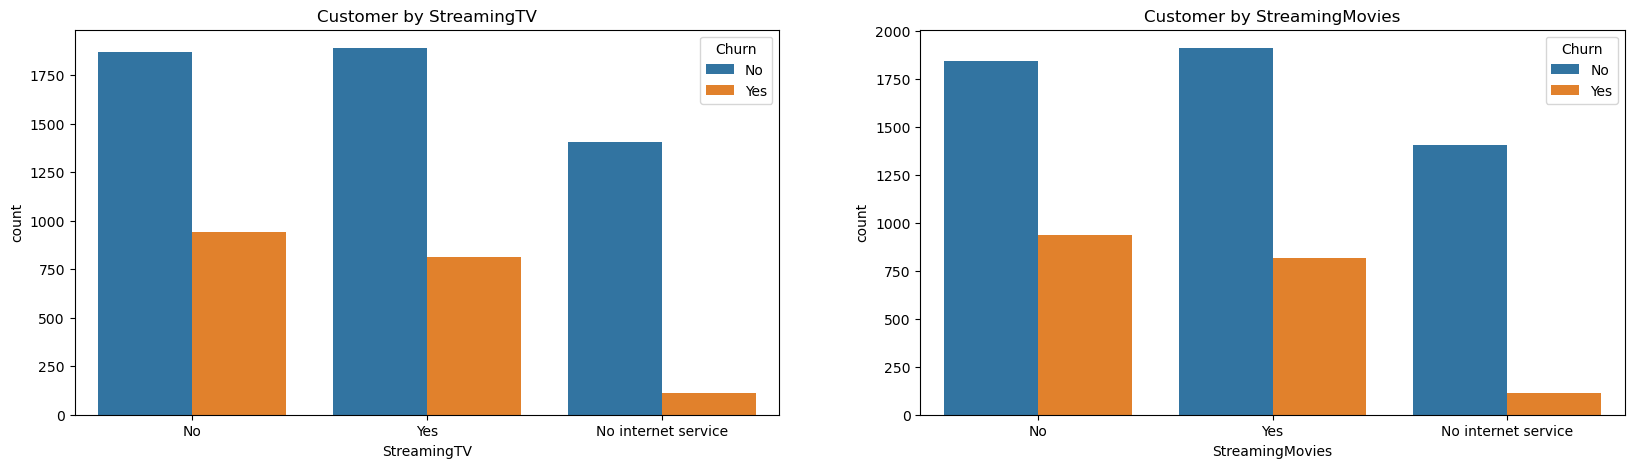

In [35]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

ax = sns.countplot(x = df['StreamingTV'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('Customer by StreamingTV')

ax = sns.countplot(x = df['StreamingMovies'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('Customer by StreamingMovies');

##### **Observation**
- Irrespectve of customers subscription to StreamingTV or not, a sizeable amount of customers have churned.
- Irrespectve of customers subscription to StreamingMovies or not, a sizeable amount of customers have churned.

##### Group 3: Services Subscribed by the Customer (Customers Security) :
- For visualization purposes, we will create 2 groups!
##### OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

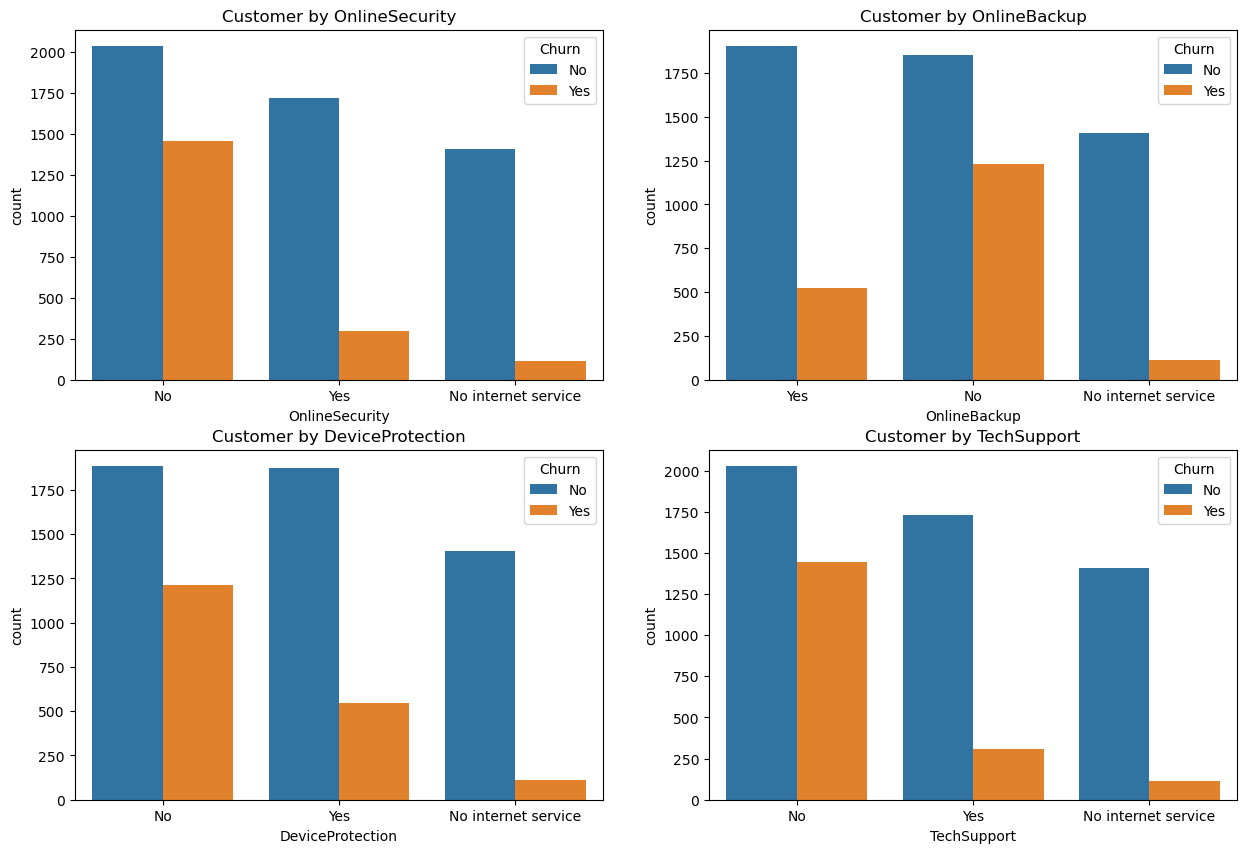

In [36]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

ax = sns.countplot(x = df['OnlineSecurity'], hue = df['Churn'], ax = axs[0,0])
axs[0,0].set_title('Customer by OnlineSecurity')

ax = sns.countplot(x = df['OnlineBackup'], hue = df['Churn'], ax = axs[0,1])
axs[0,1].set_title('Customer by OnlineBackup')

ax = sns.countplot(x = df['DeviceProtection'], hue = df['Churn'], ax = axs[1,0])
axs[1,0].set_title('Customer by DeviceProtection')

ax = sns.countplot(x = df['TechSupport'], hue = df['Churn'], ax = axs[1,1])
axs[1,1].set_title('Customer by TechSupport');



##### **Observation**
- Alot of customers have churned because of lack of online security.
- Alot of customers have churned because of lack of onlinebackup.
- Alot of customers have churned because of lack of Device Protection.
- Alot of customers have churned because of lack of TechSupport.

#### Group 4 : Contract | PaperlessBilling | PaymentMethod |

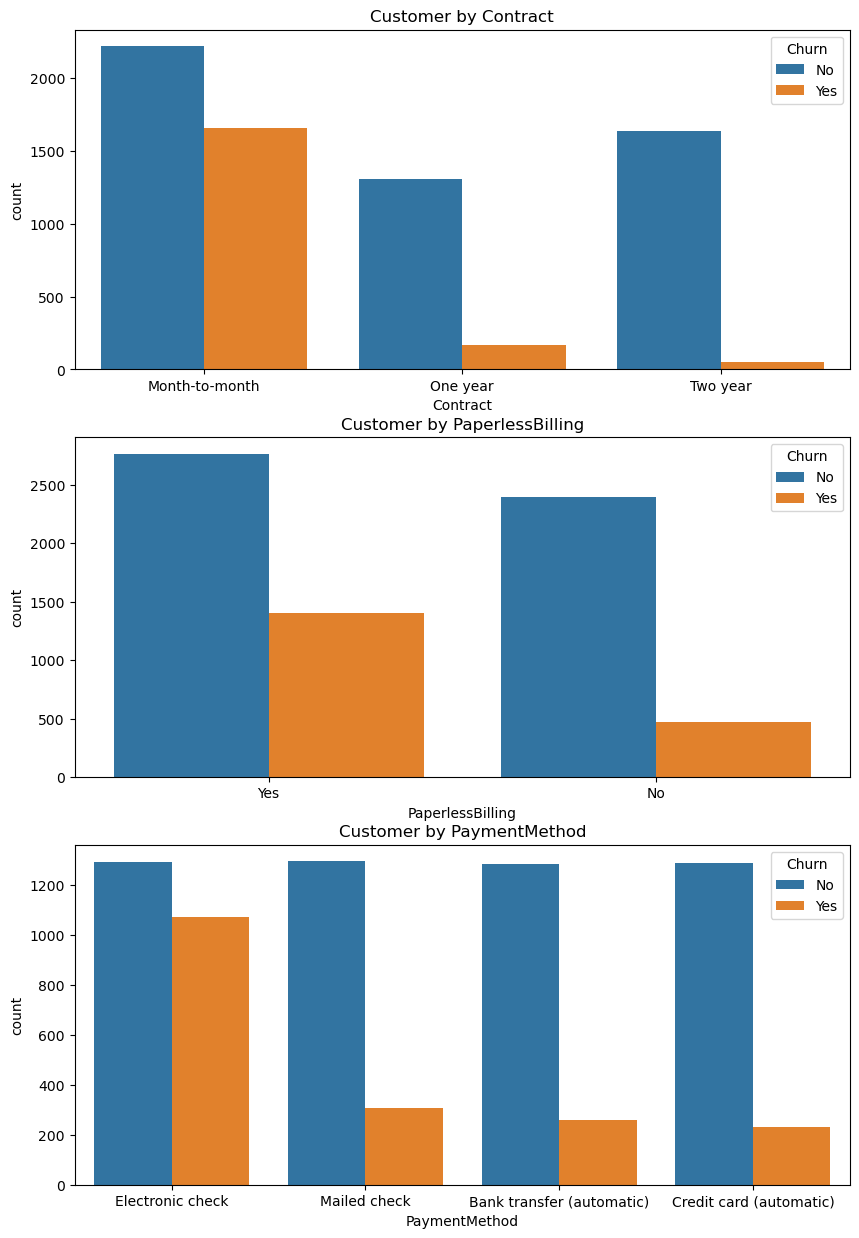

In [37]:
fig, axs = plt.subplots(3,1, figsize = (10,15))

ax = sns.countplot(x = df['Contract'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('Customer by Contract')

ax = sns.countplot(x = df['PaperlessBilling'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('Customer by PaperlessBilling')

ax = sns.countplot(x = df['PaymentMethod'], hue = df['Churn'], ax = axs[2])
axs[2].set_title('Customer by PaymentMethod');

##### **Observation**
- More than half of the customers on month-to-month contract have churned while customers with two year contract has a 
very low rate of churned customers.
- More than half of Customers who opted for PaperlessBilling has churned.
- Majority of customers who opted for Electronic check as a means of PaymentMethod have churned. Company might want to 
consider dropping this payment method or make it make it hassle-free and user-friendly.

#### Group 5 : MonthlyChargies | TotalChargies |

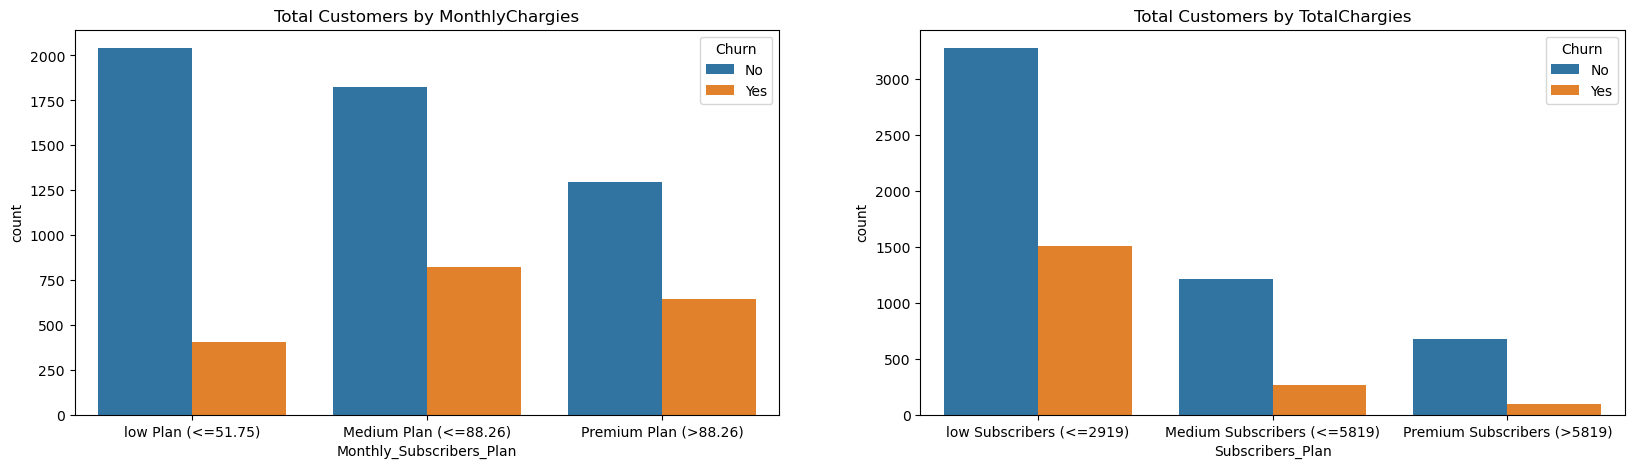

In [38]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

ax = sns.countplot(x = df['Monthly_Subscribers_Plan'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('Total Customers by MonthlyChargies')

ax = sns.countplot(x = df['Subscribers_Plan'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('Total Customers by TotalChargies');

#### **Observations**
- **For MonthlyChargies** Customers with low subscription are the most and they have less churned customers but customers 
with medium subscription has the most churned customers.
- **For TotalChargies** - Customers with low subsciber plan have the highest churn rate.

## Multivariate Analysis

### Numerical features vs Categorical features w.r.t Target variable (Churn) :

#### tenure vs Categorical Features :

#### tenure vs Group 1 : Customer Information : gender | Senior_Citizen | Partner | Dependents |

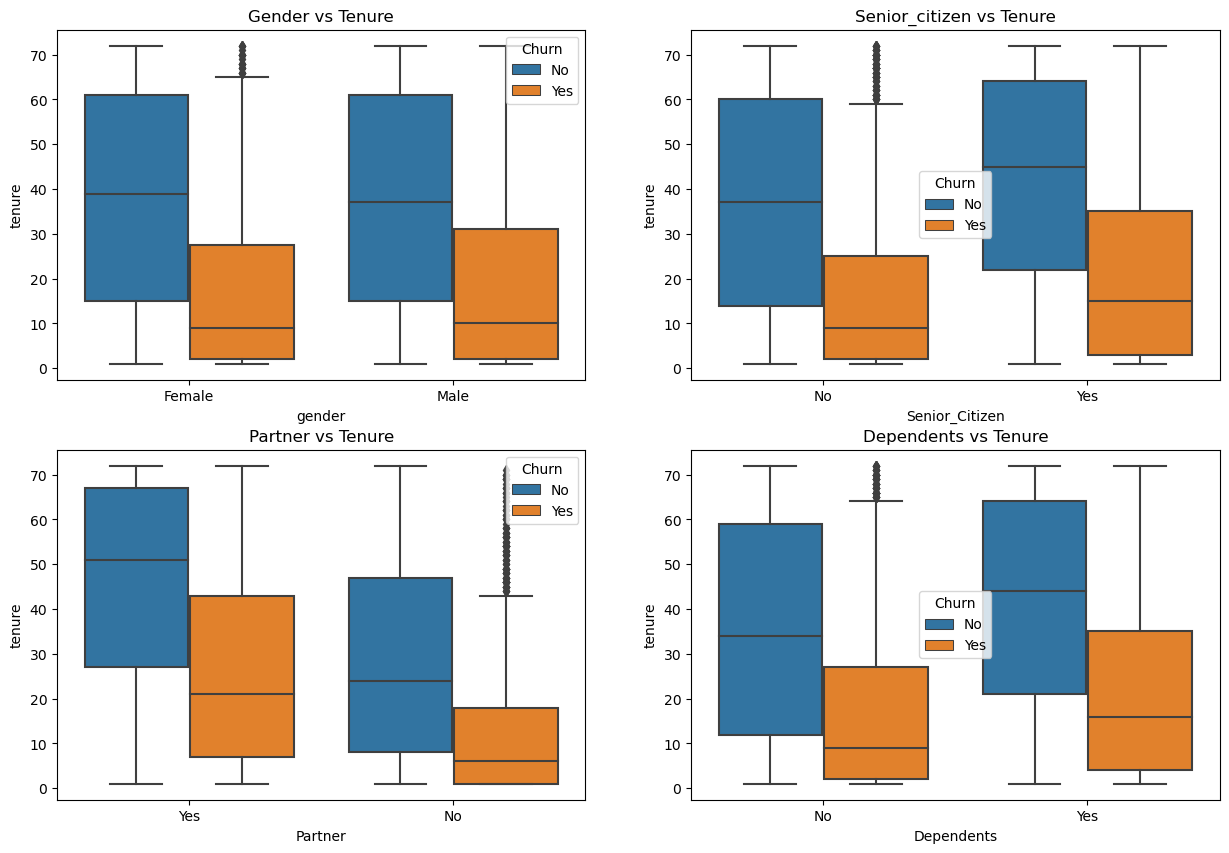

In [39]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(x = df['gender'], y = df['tenure'], hue = df['Churn'], ax = axs[0,0])
axs[0,0].set_title('Gender vs Tenure')

sns.boxplot(x = df['Senior_Citizen'], y = df['tenure'], hue = df['Churn'], ax = axs[0,1])
axs[0,1].set_title('Senior_citizen vs Tenure')

sns.boxplot(x = df['Partner'], y = df['tenure'], hue = df['Churn'], ax = axs[1,0])
axs[1,0].set_title('Partner vs Tenure')

sns.boxplot(x = df['Dependents'], y = df['tenure'], hue = df['Churn'], ax = axs[1,1])
axs[1,1].set_title('Dependents vs Tenure');

##### **Observations**
- **Male** & **Female** customer churn graphs are very similar. 
- **SeniorCitizen** opted out from the services for a tenure values of **0 - 35** months, while custommers who aren't senoir citizens opted out between the months **0 - 27**
- Customers with dependents are quite similar to senior citizen customers
- Customers with partners opted out from the service for a **tenure** of **5 - 45** months, while Customers without partners opted out from the service for a **tenure** of **0 - 20** months, 

#### tenure vs Group 2.1: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | 

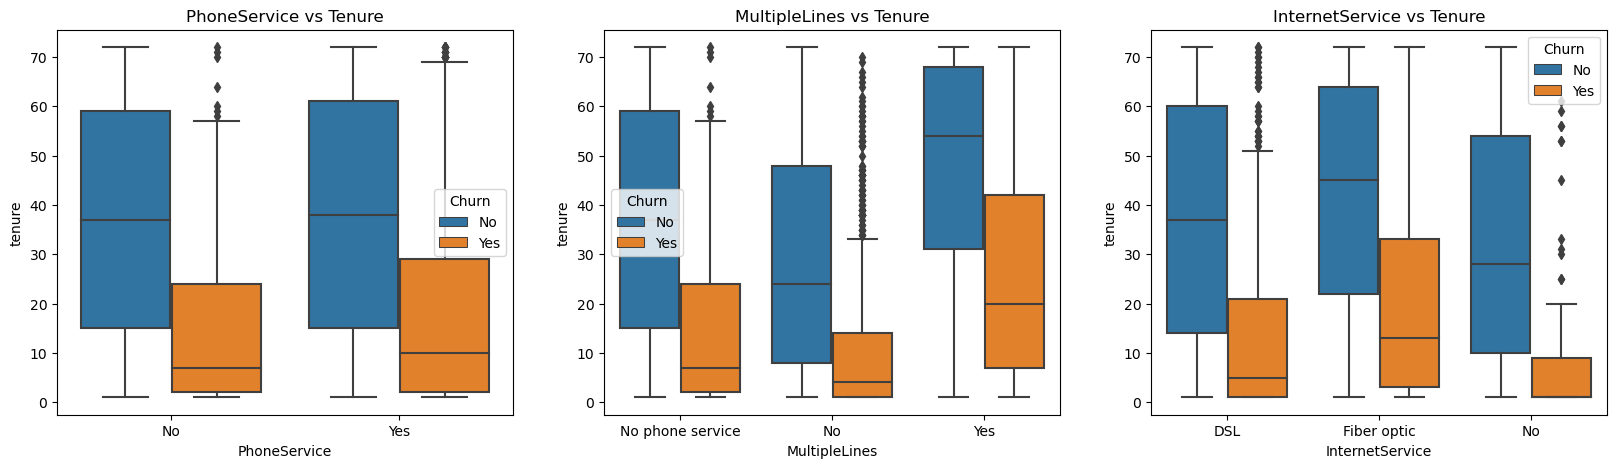

In [40]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

sns.boxplot(x = df['PhoneService'], y = df['tenure'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('PhoneService vs Tenure')

sns.boxplot(x = df['MultipleLines'], y = df['tenure'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('MultipleLines vs Tenure')

sns.boxplot(x = df['InternetService'], y = df['tenure'], hue = df['Churn'], ax = axs[2])
axs[2].set_title('InternetService vs Tenure');

##### **Observations**
- Customers without phone service churned within the first 25months while Customers with phone service churned within the first 30months.
- Customers without multiplelines churned within the first 15months while Customers with phone service churned within tenure **8 - 40 months**.
- For **InternetService**, customers seem to be very skeptical about the usage of **Optic Fibre** cables as the churning lasted for about **30 - 35** months.

#### tenure vs Group 2.2: StreamingTV | StreamingMovies |

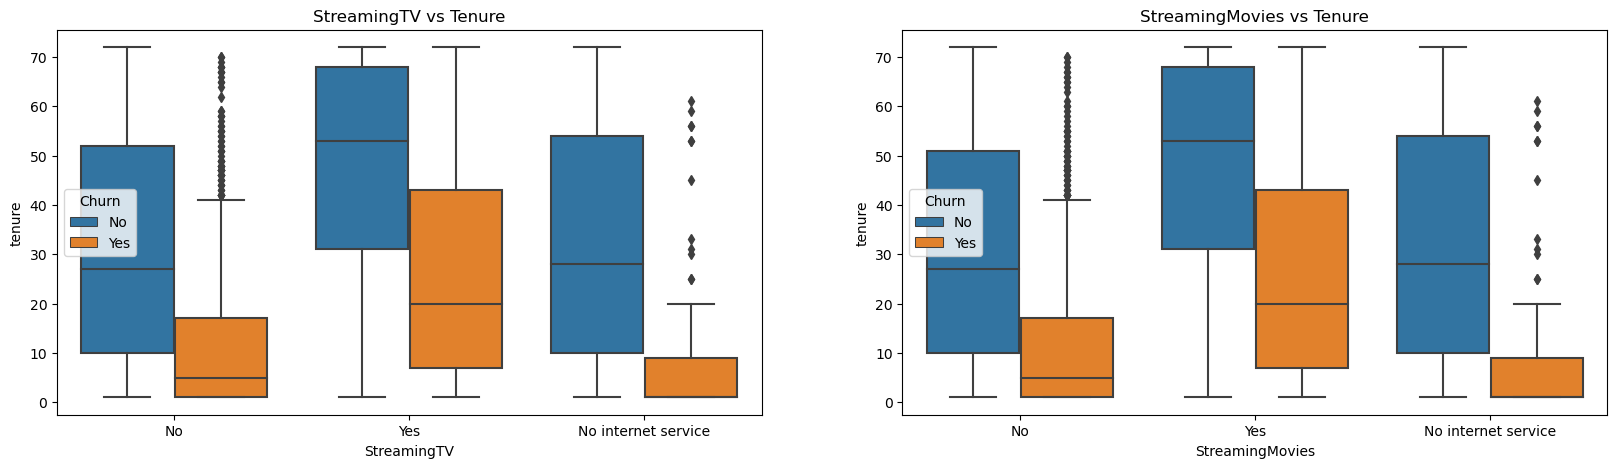

In [41]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

sns.boxplot(x = df['StreamingTV'], y = df['tenure'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('StreamingTV vs Tenure')

sns.boxplot(x = df['StreamingMovies'], y = df['tenure'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('StreamingMovies vs Tenure');

##### **Observations**
- Similary for Customers with **StreamingTV** & **StreamingMovies**, a churn tenure period of about **10 - 40** months can be observed,
- Those without **StreamingTV** & **StreamingMovies**, a churn tenure period of about the first **15months can be observed.
- Customers without **StreamingTV** & **StreamingMovies**, a churn tenure period of about the first **5months can be observed.

##### tenure vs Group 3: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

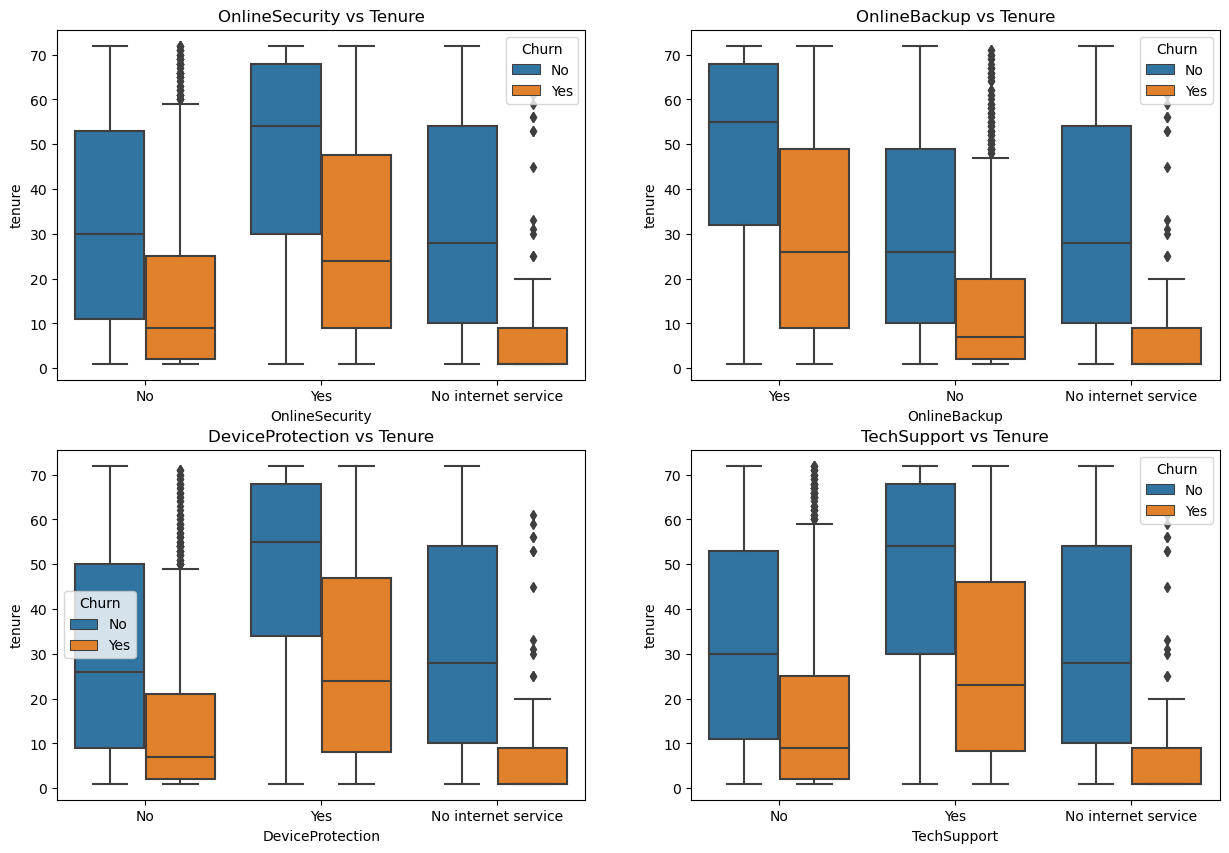

In [42]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(x = df['OnlineSecurity'], y = df['tenure'], hue = df['Churn'], ax = axs[0,0])
axs[0,0].set_title('OnlineSecurity vs Tenure')

sns.boxplot(x = df['OnlineBackup'], y = df['tenure'], hue = df['Churn'], ax = axs[0,1])
axs[0,1].set_title('OnlineBackup vs Tenure')

sns.boxplot(x = df['DeviceProtection'], y = df['tenure'], hue = df['Churn'], ax = axs[1,0])
axs[1,0].set_title('DeviceProtection vs Tenure')

sns.boxplot(x = df['TechSupport'], y = df['tenure'], hue = df['Churn'], ax = axs[1,1])
axs[1,1].set_title('TechSupport vs Tenure');

##### **Observations**
- For those with **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** & **TechSupport**, median churn tenure value is of **25** months. The highest value of this churn tenure is of around **45** months.

#### tenure vs Group 4 : Contract | PaperlessBilling | PaymentMethod |

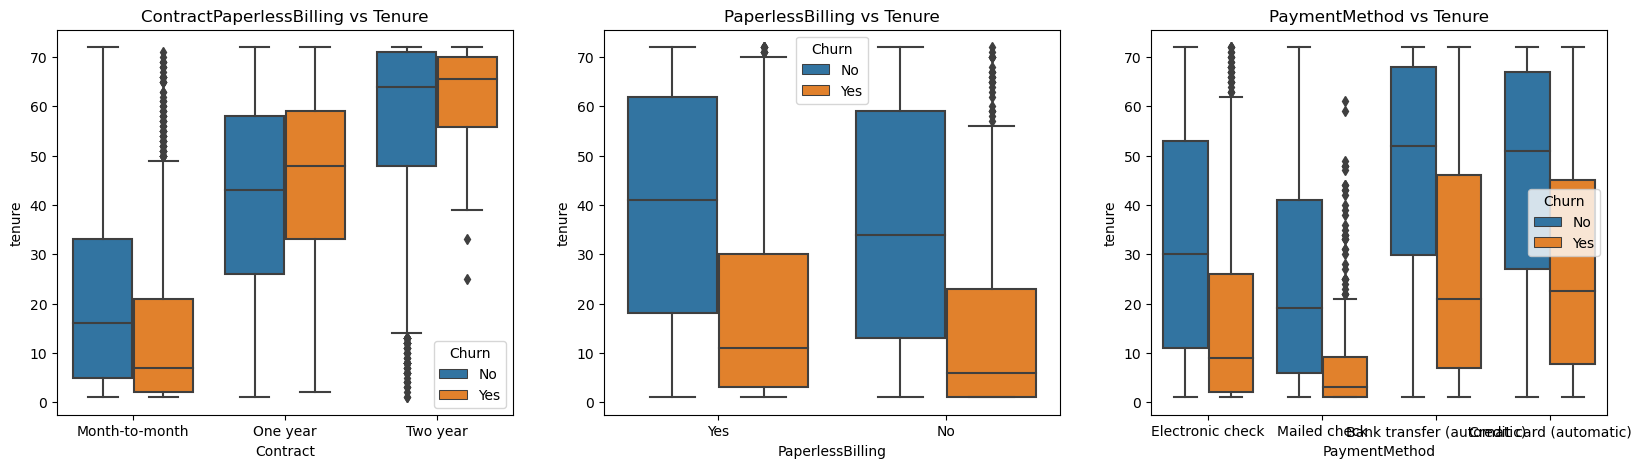

In [43]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

sns.boxplot(x = df['Contract'], y = df['tenure'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('ContractPaperlessBilling vs Tenure')

sns.boxplot(x = df['PaperlessBilling'], y = df['tenure'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('PaperlessBilling vs Tenure')

sns.boxplot(x = df['PaymentMethod'], y = df['tenure'], hue = df['Churn'], ax = axs[2])
axs[2].set_title('PaymentMethod vs Tenure');

##### **Observations**
- When customers sign **One year** and **Two year** contracts for the services, they seem to continue with the services for about **25** and **50** months respectively! However, they start questioning the services and switching from the **35** month and **55** month mark respectively!
- Irrespective of the **PaperlessBilling**, customers start switching arount the 1st month.
- When it comes to **PaymentMethod**, median churn tenure of **Bank Transfer (automatic)** & **Credit Card (automatic)**, **above 20 months**, is nearly double than that of **Electronic check** & **Mailed check**, **around 10 months** & **around 5 months** respectively.

#### Group 5 : MonthlyChargies | TotalChargies |

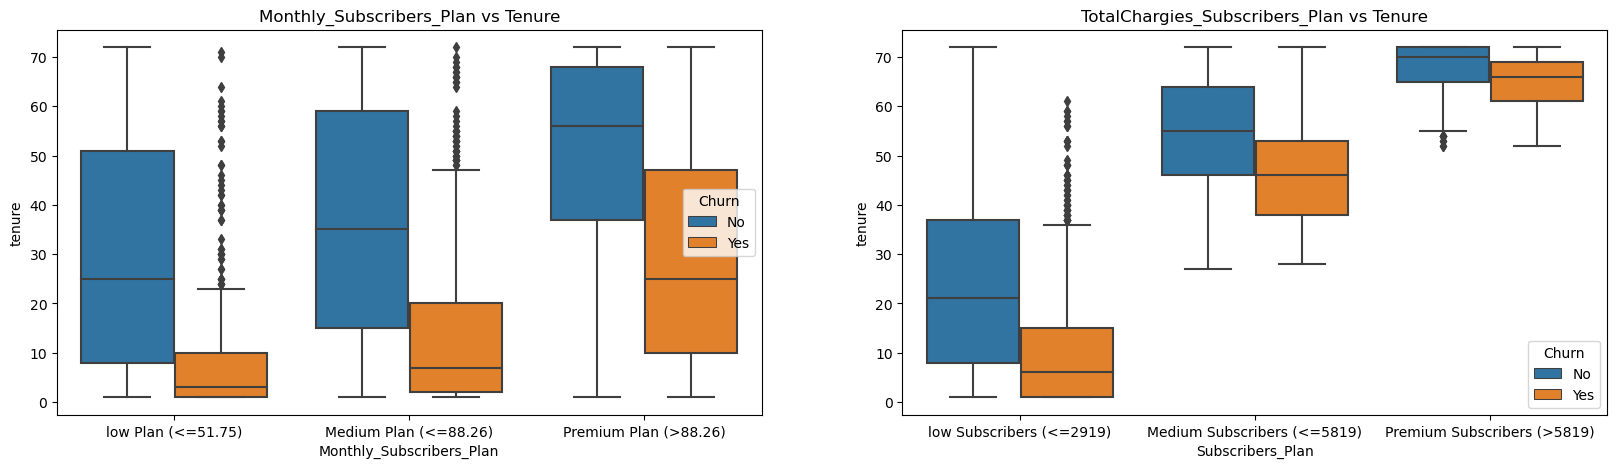

In [44]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

sns.boxplot(x = df['Monthly_Subscribers_Plan'], y = df['tenure'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('Monthly_Subscribers_Plan vs Tenure')

sns.boxplot(x = df['Subscribers_Plan'], y = df['tenure'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('TotalChargies_Subscribers_Plan vs Tenure');

##### **Observations**
- **For monthly subscribers**, premium subscinbers tend to start churning around **10 - 50 months**, while the order subscribers start churning immediateley.
- **For Totalchargies_plan subscribers**, low subscribers start churning immediatelt. The medium subcribers start subscription around the **30th month** and start to churn in the **40th month**, while premium subcribers start to churn in **55th month**.

### MonthlyCharges vs Categorical Features :

#### MonthlyCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

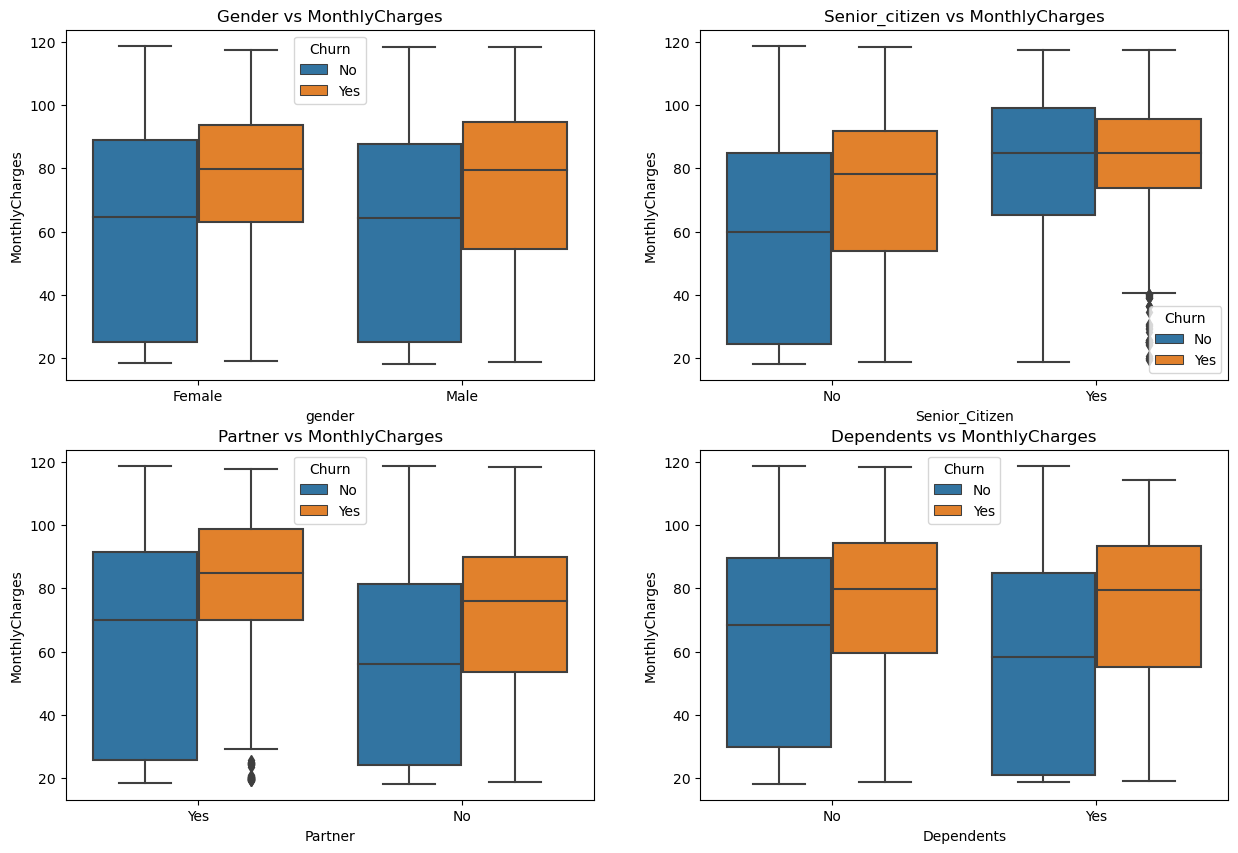

In [45]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(x = df['gender'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[0,0])
axs[0,0].set_title('Gender vs MonthlyCharges')

sns.boxplot(x = df['Senior_Citizen'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[0,1])
axs[0,1].set_title('Senior_citizen vs MonthlyCharges')

sns.boxplot(x = df['Partner'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[1,0])
axs[1,0].set_title('Partner vs MonthlyCharges')

sns.boxplot(x = df['Dependents'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[1,1])
axs[1,1].set_title('Dependents vs MonthlyCharges');

##### **Observations**
- For all categories displayed above, the **churned customers** have same median monthly charge of about **80**
- For all the features mentioned above, the median value of the **not-churn** customers is very close to the lower limit of the **churn** customers. 
- **Male** & **Female** customers have the same median **MonthlyCharges** of around **60**. For **SeniorCitizen**, this value is pushed to **80**.
- Customers living with **Partner** have a higher lower limit of churning, **MonthlyCharges** of **70**, than those living alone, **MonthlyCharges** of **just below 60**!  

#### MonthlyCharges vs Group 2.1: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | 

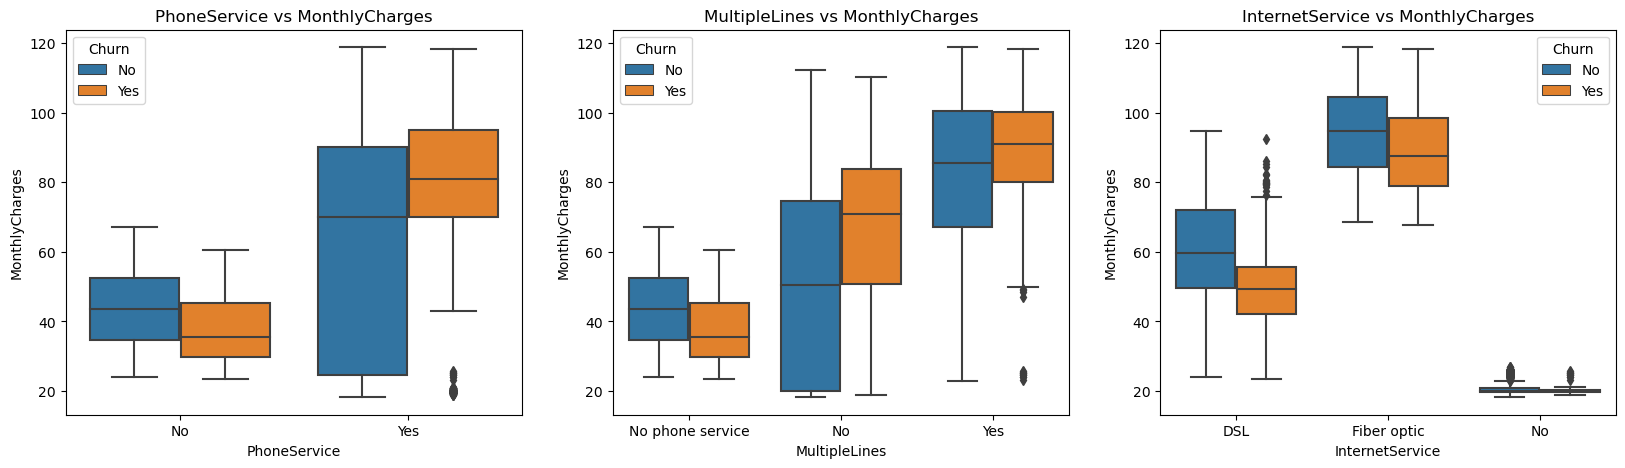

In [46]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

sns.boxplot(x = df['PhoneService'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('PhoneService vs MonthlyCharges')

sns.boxplot(x = df['MultipleLines'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('MultipleLines vs MonthlyCharges')

sns.boxplot(x = df['InternetService'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[2])
axs[2].set_title('InternetService vs MonthlyCharges');

##### Observations
- **MonthlyCharges** of **Fiber Optic** cables is very high. Thus, it might be the reason for such high churn of customers.
- Churned Customers who have access to multiplelines have monthly chargies range from about  **80 - 100**
- Range of **MonthlyCharges** for **PhoneService** is from **25 - 85** but customers think of unsubscribing from **75** value of **MonthlyCharges**.

#### MonthlyCharges vs Group 2.2: StreamingTV | StreamingMovies |

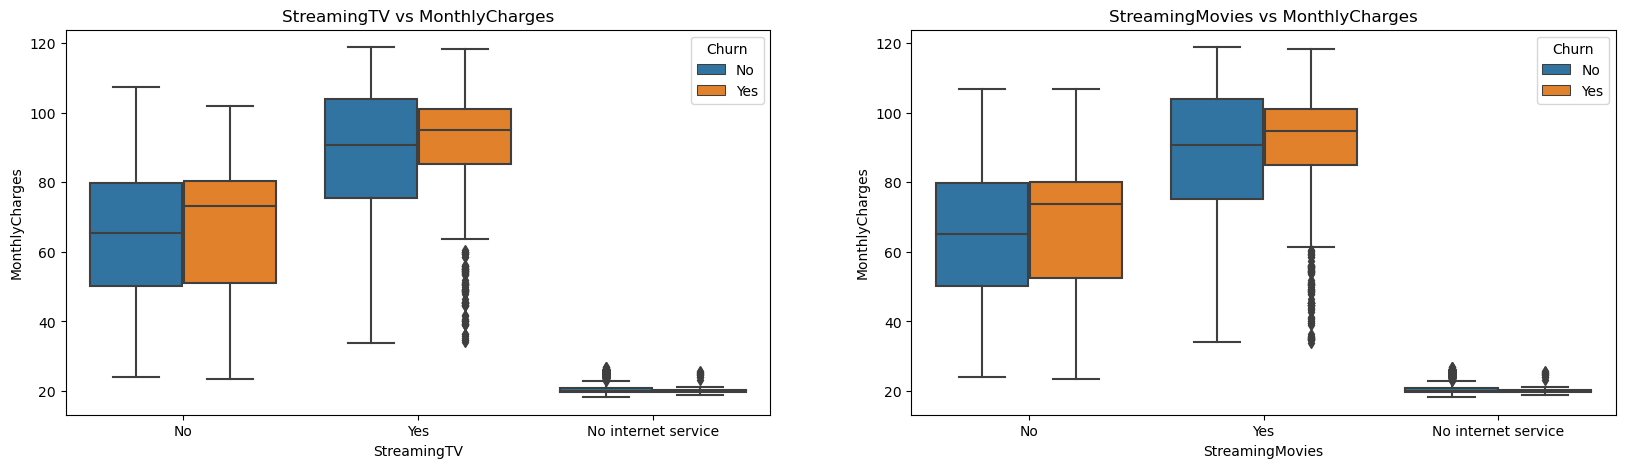

In [47]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

sns.boxplot(x = df['StreamingTV'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('StreamingTV vs MonthlyCharges')

sns.boxplot(x = df['StreamingMovies'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('StreamingMovies vs MonthlyCharges');

#### Observations
- **MonthlyCharges** of **StreamingTV** & **StreamingMovies** is quite high.

#### MonthlyCharges vs Group 3: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

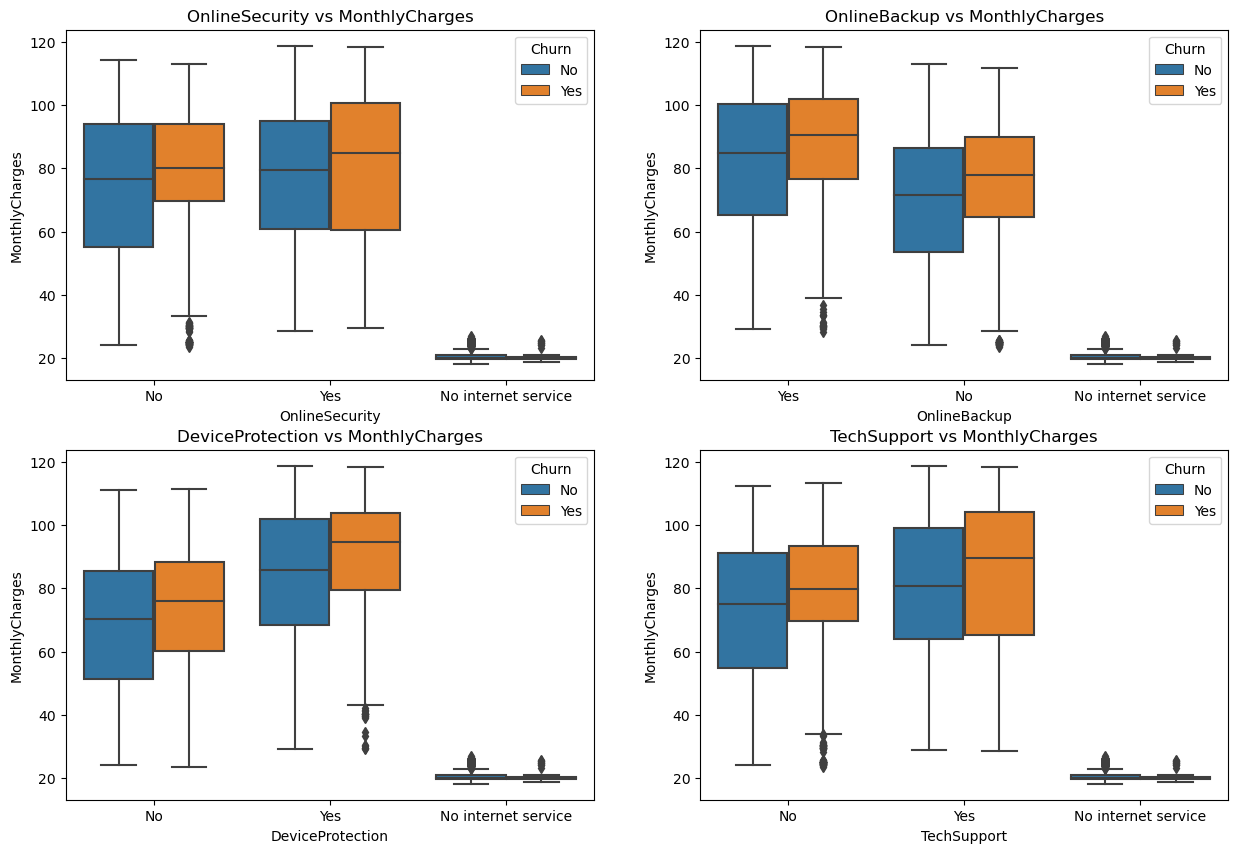

In [48]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(x = df['OnlineSecurity'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[0,0])
axs[0,0].set_title('OnlineSecurity vs MonthlyCharges')

sns.boxplot(x = df['OnlineBackup'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[0,1])
axs[0,1].set_title('OnlineBackup vs MonthlyCharges')

sns.boxplot(x = df['DeviceProtection'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[1,0])
axs[1,0].set_title('DeviceProtection vs MonthlyCharges')

sns.boxplot(x = df['TechSupport'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[1,1])
axs[1,1].set_title('TechSupport vs MonthlyCharges');

##### Observations
- Churned Customers who had access to online security have a bigger range of monthlychargies
- Customers who have device protection have an higher range of monthly chargies than those without customers

#### MonthlyCharges vs Group 4 : Contract | PaperlessBilling | PaymentMethod |

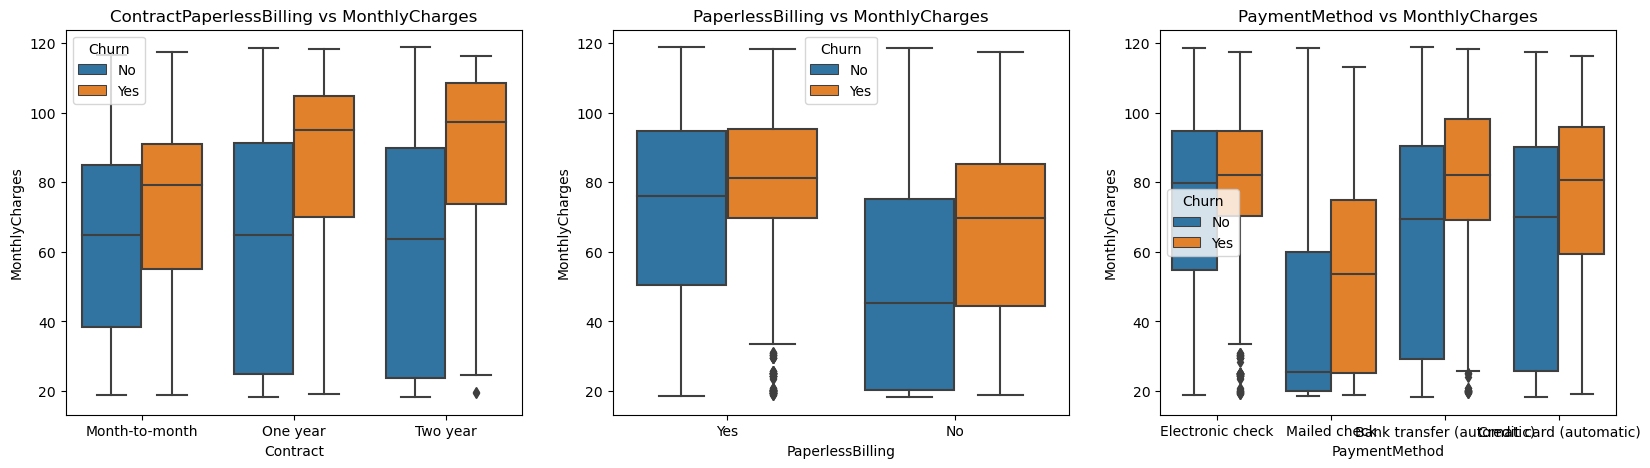

In [49]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

sns.boxplot(x = df['Contract'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('ContractPaperlessBilling vs MonthlyCharges')

sns.boxplot(x = df['PaperlessBilling'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('PaperlessBilling vs MonthlyCharges')

sns.boxplot(x = df['PaymentMethod'], y = df['MonthlyCharges'], hue = df['Churn'], ax = axs[2])
axs[2].set_title('PaymentMethod vs MonthlyCharges');

##### **Observations**
- Lower limit of the **MonthlyCharges** is higher for **Month-to-Month** contract than **One year** & **Two year** contracts. However the lower limit of the customers who discontinue the services is lower for **Month-to-Month** contract.
- Lower limit of the **Electronic check** is very high and it can be a huge factor due to which customers resent using it! Whereas **Mailed check** has the lowest starting values of customers who left and continued.
- Lower limit of customers who subscribe to **paperlessbilling** is very high compared to those didn't subscribe

### TotalCharges vs Categorical Features :

#### TotalCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

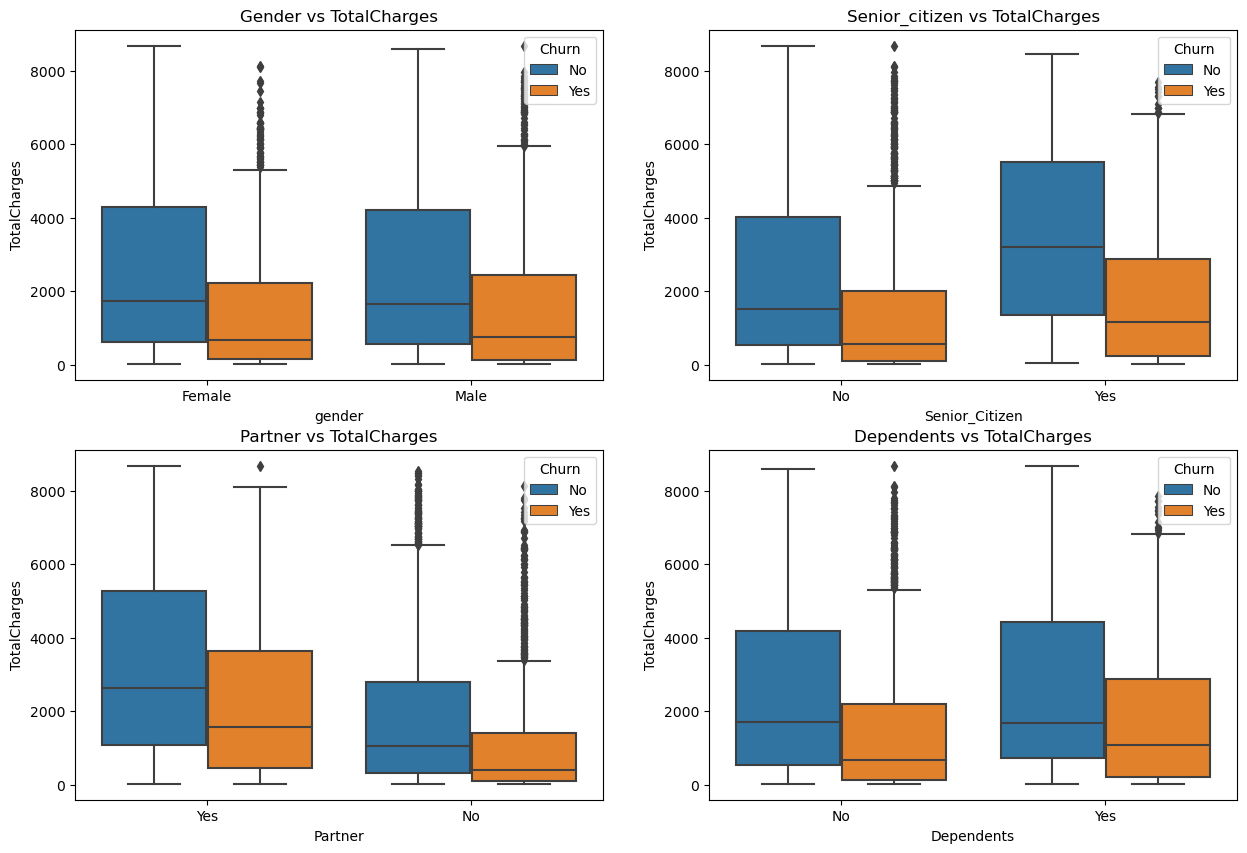

In [50]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(x = df['gender'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[0,0])
axs[0,0].set_title('Gender vs TotalCharges')

sns.boxplot(x = df['Senior_Citizen'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[0,1])
axs[0,1].set_title('Senior_citizen vs TotalCharges')

sns.boxplot(x = df['Partner'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[1,0])
axs[1,0].set_title('Partner vs TotalCharges')

sns.boxplot(x = df['Dependents'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[1,1])
axs[1,1].set_title('Dependents vs TotalCharges');

##### **Observations**
- **TotalCharges** for **male** & **female** customers is quite the same
- **SeniorCitizen** that continued with the services have a higher starting and closing values of **TotalCharges** of around **1500 - 5800**, while those who opted out paid around **0 - 3000**.
- Customers housing with their **Partner** have a higher median value of **TotalCharges** as compared to those living alone!
- Customers with **partners** who opted out paid around **500 - 4000**, while those **without partners** who opted out paid around **0 - 1500**.
- Customers with **dependent** who opted out paid around **0 - 3000**, while those **without dependent** who opted out paid around **0 - 2000**.

#### TotalCharges vs Group 2.1 : Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

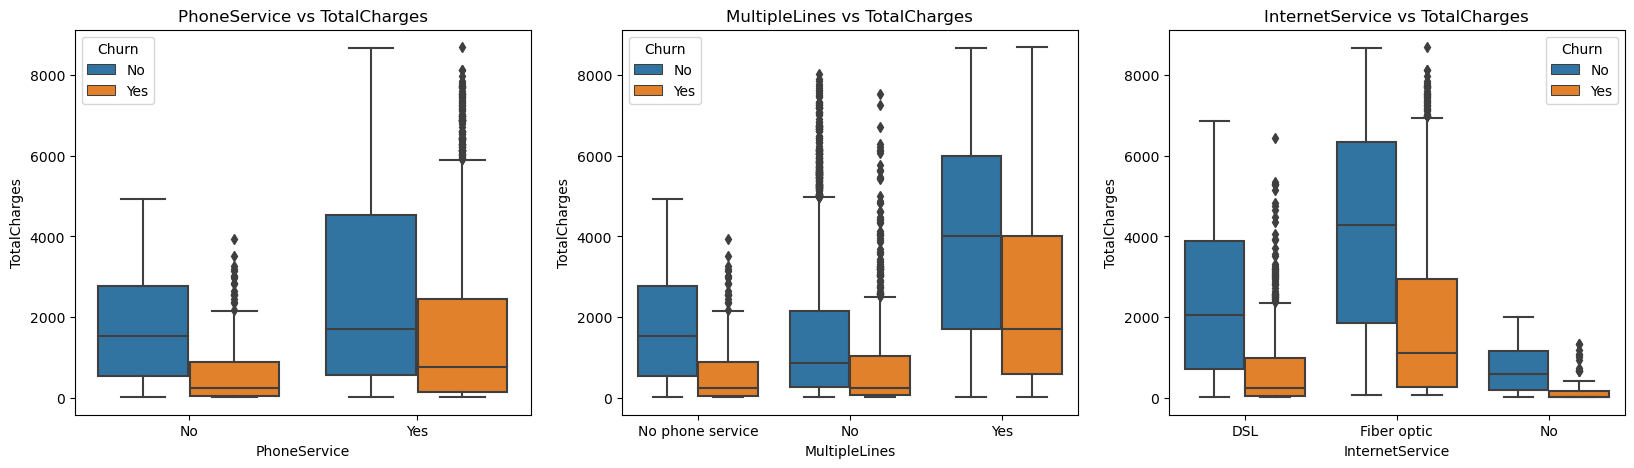

In [51]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

sns.boxplot(x = df['PhoneService'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('PhoneService vs TotalCharges')

sns.boxplot(x = df['MultipleLines'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('MultipleLines vs TotalCharges')

sns.boxplot(x = df['InternetService'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[2])
axs[2].set_title('InternetService vs TotalCharges');

#### **Observations**
- Customers with phoneservice who opted out paid in the range of **0 - 2000**. 
- While those with multiplelines who continued with the service paid as high within the range of **2000 - 6000** and for those who opted out paid around **500 - 4000**. 
- For internetservice, Customers with fiber optic paid the highest TotalChargies within the range of **2000 - 6000** and those that stop their subscription paid around **0 - 3000**.

#### TotalCharges vs Group 2.2 :StreamingTV | StreamingMovies |

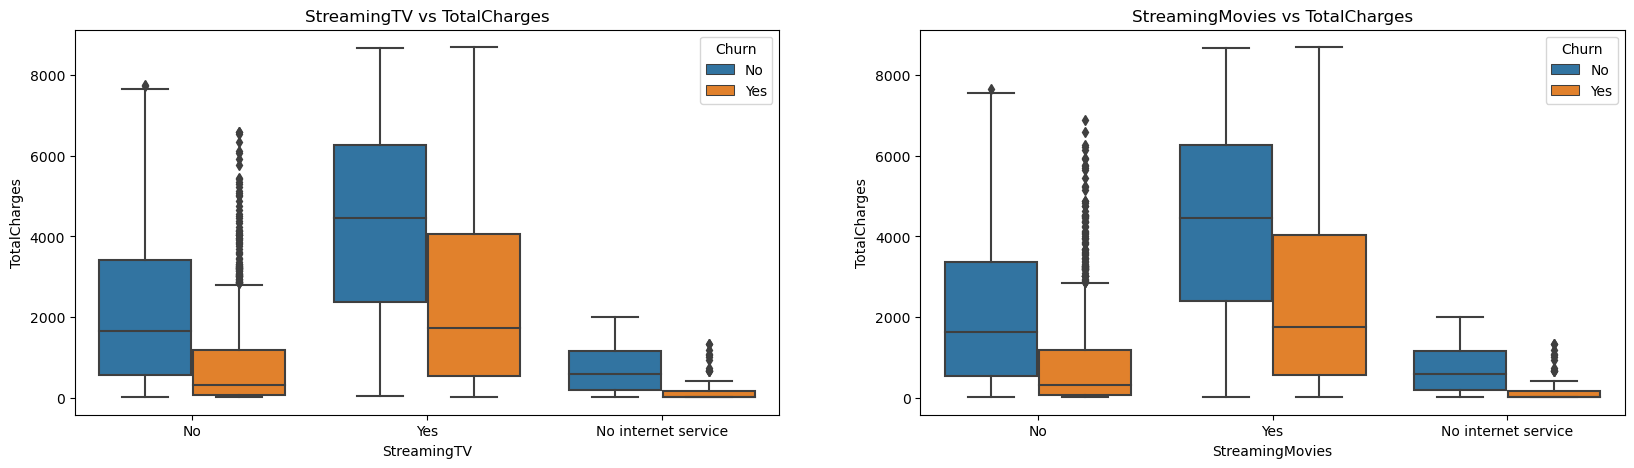

In [52]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

sns.boxplot(x = df['StreamingTV'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('StreamingTV vs TotalCharges')

sns.boxplot(x = df['StreamingMovies'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('StreamingMovies vs TotalCharges');

##### **Observations**
- For **StreamingTV** & **StreamingMovies**, customers that continue with the services pay from **3000- 6000**, while those who opted out paid around **500 - 4000**. 

#### TotalCharges vs Group 3: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

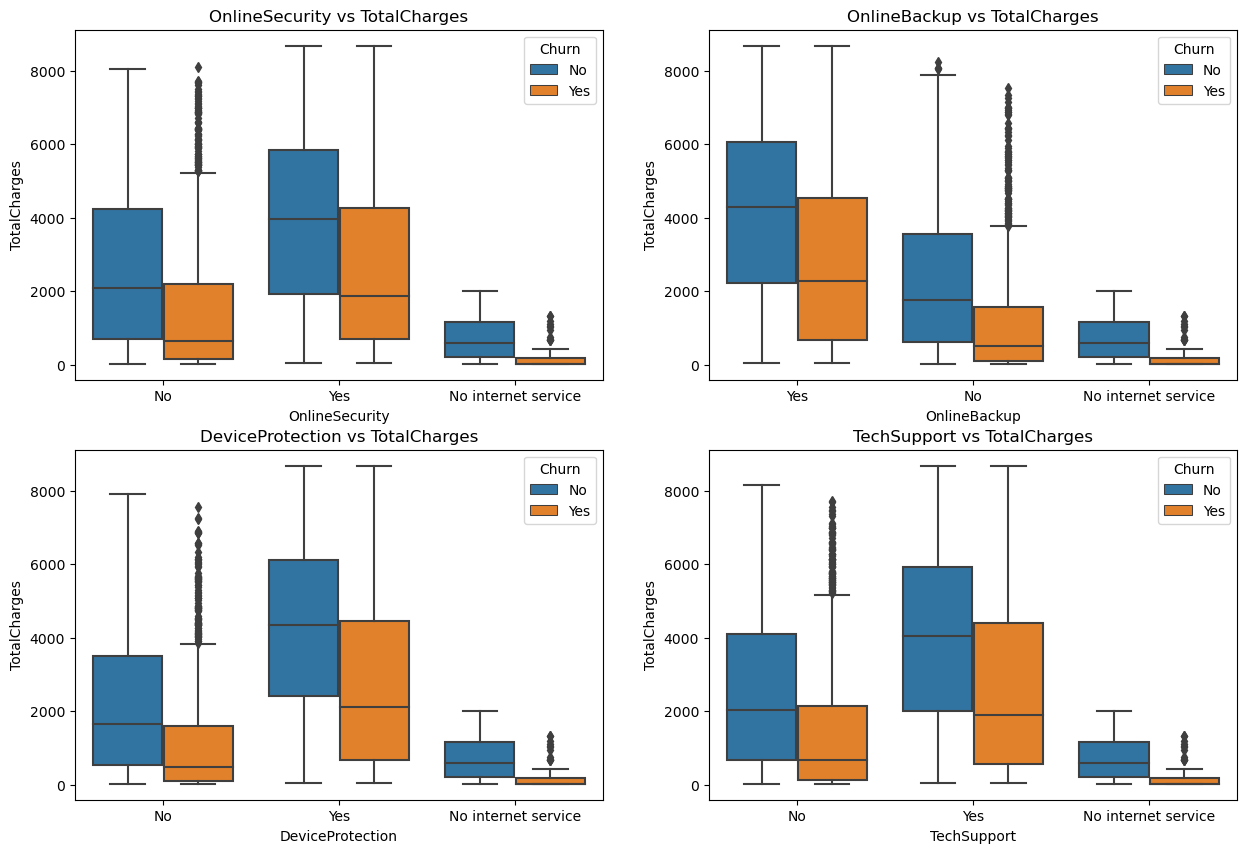

In [53]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(x = df['OnlineSecurity'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[0,0])
axs[0,0].set_title('OnlineSecurity vs TotalCharges')

sns.boxplot(x = df['OnlineBackup'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[0,1])
axs[0,1].set_title('OnlineBackup vs TotalCharges')

sns.boxplot(x = df['DeviceProtection'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[1,0])
axs[1,0].set_title('DeviceProtection vs TotalCharges')

sns.boxplot(x = df['TechSupport'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[1,1])
axs[1,1].set_title('TechSupport vs TotalCharges');

##### **Observations**
- For all the features mentioned above, customers who opted out paid within the range of about **1000 - 5000**, while all their median tottalchargies were around **2000** 
- Customers with deviceprotection that do not churn out are ready to pay from **2000 - 6000** of **TotalCharges**.

#### TotalCharges vs Group 4 : Contract | PaperlessBilling | PaymentMethod |

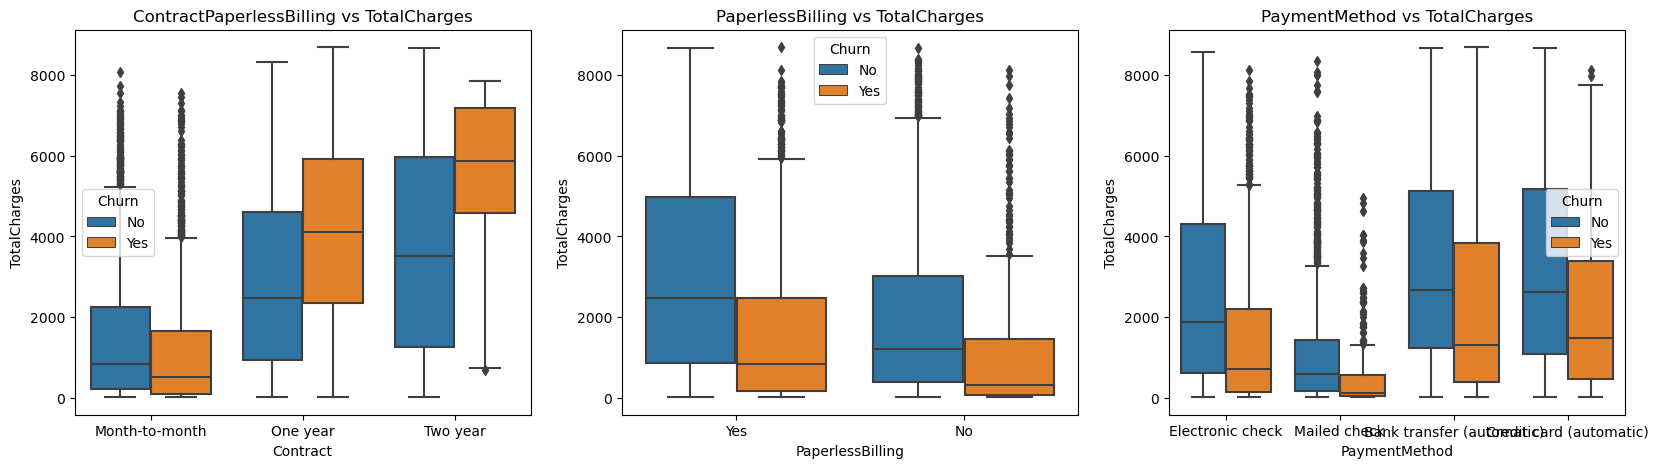

In [54]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

sns.boxplot(x = df['Contract'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[0])
axs[0].set_title('ContractPaperlessBilling vs TotalCharges')

sns.boxplot(x = df['PaperlessBilling'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[1])
axs[1].set_title('PaperlessBilling vs TotalCharges')

sns.boxplot(x = df['PaymentMethod'], y = df['TotalCharges'], hue = df['Churn'], ax = axs[2])
axs[2].set_title('PaymentMethod vs TotalCharges');

##### **Observations**


- Median values of customers that decide to opt out from the services that have **One year** & **Two year** contracts is high at **around 4000 & 6000** respectively. Some of the customers with **Two year** contracts even paid as high as around **7000**.
- For **PaymentMethod**, customers who opted out from **Electronic check** pay for a shorter range of **0 - 2000**. For **Bank transfer (automatic)** & **Credit Card (automatic)** this range is around **0 - 4000**, while for **Mailed check** customers, who opted out, their payment is insignificant

## Feature Engineering / Data Pre-processing

In [56]:
#dropping off some redundant features

df.drop(['customerID','Senior_Citizen','Subscribers_Plan','Monthly_Subscribers_Plan'], axis = 1, inplace = True)

#creating a copy of the dataset for part B
df1 = df.copy()

In [57]:
# Encoding Categorical datatype into numerical datatype using Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df1.copy(deep = True)
category_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in category_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [58]:
# Scaling the numerical data between 0 and 1
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

### Correlation Matrix :

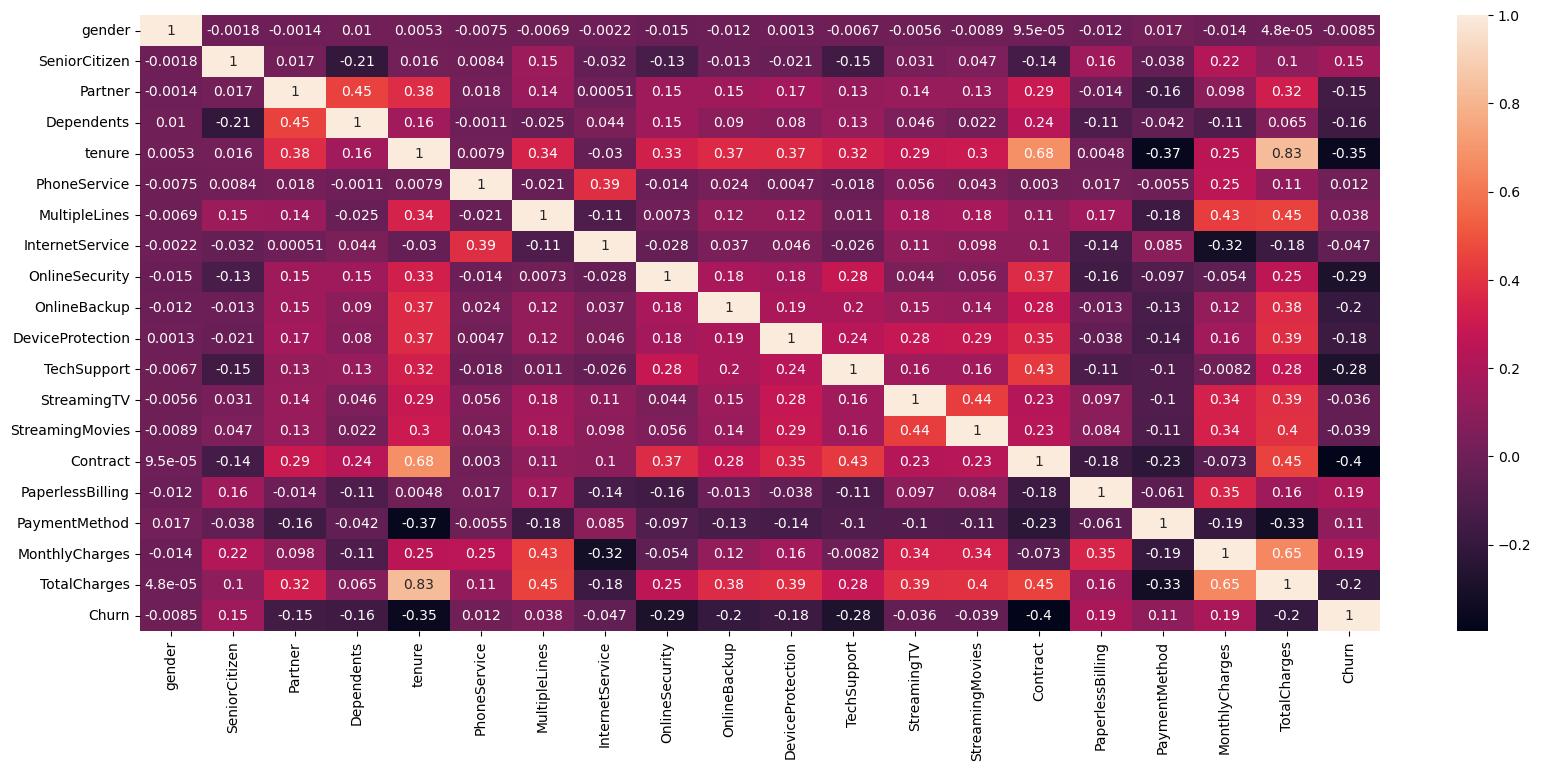

In [119]:
plt.figure(figsize = (20,8))
sns.heatmap(df1.corr(),annot = True);

##### **Observations**
- **MulipleLines**, **PhoneService**, **gender**, **StreamingTV**, **StreamingMovies** and **InternetService** does not display any kind of correlation. 
- Remaining features either display a weak **positive or negative correlation**.

### Data Balancing using SMOTE :

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
- For data balancing, we will use **imblearn**.
    - **pip statement** : pip install imbalanced-learn

In [60]:
#pip install imblearn

In [61]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [62]:
# Segment dataset into data and target label (i.e to remove the target variable(Churn) from the rest of the dataset)
# f1 = data, y = target

over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:19].values
t1 = df1.iloc[:,19].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)


Counter({0: 5163, 1: 5163})

###### **Observations**
- The dataset is now balanced after using SMOTE

# Modeling

In [63]:
# Classifier Libraries (Classifiers are machine learning Algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier                     #(pip install xgboost)
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# For Evaluation Metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Split the dataset into training and testing sets (x = Questions, y = Answers)

X_train, X_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.2, random_state = 42)

### 1. SGDClassifier

In [66]:
sgd = SGDClassifier()

sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)

print("SGDClassifier")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print("Precision:", precision_score(y_test, sgd_pred))
print("Recall:", recall_score(y_test, sgd_pred))
print("F1-score:", f1_score(y_test, sgd_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgd_pred))

SGDClassifier
Accuracy: 0.7473378509196515
Precision: 0.6963594113090628
Recall: 0.8736637512147716
F1-score: 0.775
AUC-ROC: 0.7478251253663057


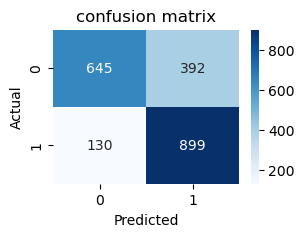

In [67]:
# To create a confusion matrix SGDClassifier

fig, ax = plt.subplots(figsize = (3,2))
sgd = confusion_matrix(y_test, sgd_pred)

# To visualize the confusion matrix
sns.heatmap(sgd, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

#####  
- True Positive (TP): Customers who churned
- True Negative (TN): Customers who didn't churn
- False Positive (FP): Model predicted churn but in actual reality customers didn't churn
- False Negative (FN): Model predicted not-churn but in actual reality customers churned.

##### Observations for SGDClassifier
From the observation above:
- TP - 899
- TN - 645
- FP - 392
- FN - 130

### 2. KNeighborsClassifier

In [68]:
knc = KNeighborsClassifier()

knc.fit(X_train, y_train)

knc_pred = knc.predict(X_test)

print("KNeighborsClassifier")
print("Accuracy:", accuracy_score(y_test, knc_pred))
print("Precision:", precision_score(y_test, knc_pred))
print("Recall:", recall_score(y_test, knc_pred))
print("F1-score:", f1_score(y_test, knc_pred))
print("AUC-ROC:", roc_auc_score(y_test, knc_pred))

KNeighborsClassifier
Accuracy: 0.776863504356244
Precision: 0.7294022617124394
Recall: 0.8775510204081632
F1-score: 0.7966475518306132
AUC-ROC: 0.7772518843603015


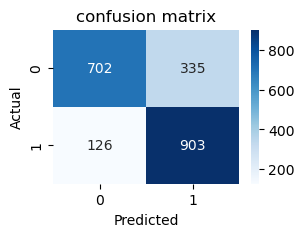

In [69]:
# To create a confusion matrix for KNeighborsClassifier

fig,ax = plt.subplots(figsize = (3,2))
knc = confusion_matrix(y_test, knc_pred)

# To visualize the confusion matrix
sns.heatmap(knc, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

##### Observations for KNeighborsClassifier
From the observation above:
- TP - 903
- TN - 702
- FP - 335
- FN - 126

### 3.Random Forest Classifier

In [70]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("Precision:", precision_score(y_test, rfc_pred))
print("Recall:", recall_score(y_test, rfc_pred))
print("F1-score:", f1_score(y_test, rfc_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfc_pred)) 

Random Forest Classifier
Accuracy: 0.8494675701839303
Precision: 0.8445297504798465
Recall: 0.8551992225461613
F1-score: 0.8498309995171415
AUC-ROC: 0.8494896787754914


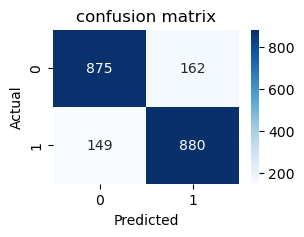

In [71]:
# To create a confusion matrix Random Forest Classifier

fig,ax = plt.subplots(figsize = (3,2))
rfc = confusion_matrix(y_test, rfc_pred)

# To visualize the confusion matrix
sns.heatmap(rfc, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()


##### Observations for Random Forest Classifier
From the observation above:
- TP - 880
- TN - 875
- FP - 162
- FN - 149

### 4. Logistics Regression

In [72]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1-score:", f1_score(y_test, lr_pred))
print("AUC-ROC:", roc_auc_score(y_test, lr_pred))

Logistic Regression
Accuracy: 0.7637947725072604
Precision: 0.7470319634703196
Recall: 0.7949465500485908
F1-score: 0.7702448210922788
AUC-ROC: 0.7639149336549608


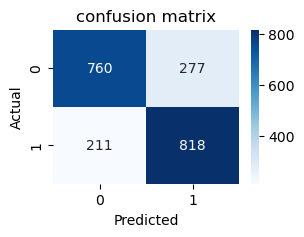

In [73]:
# To create a confusion matrix logistics Regression

fig,ax = plt.subplots(figsize = (3,2))

lr = confusion_matrix(y_test, lr_pred)

# To visualize the confusion matrix
sns.heatmap(lr, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

##### Observations for Logistics Regression
From the observation above:
- TP - 818
- TN - 760
- FP - 277
- FN - 211

### 5. XGBClassifier

In [74]:
xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)

xgbc_pred = xgbc.predict(X_test)

print("XGB Classifier")
print("Accuracy:", accuracy_score(y_test, xgbc_pred))
print("Precision:", precision_score(y_test, xgbc_pred))
print("Recall:", recall_score(y_test, xgbc_pred))
print("F1-score:", f1_score(y_test, xgbc_pred))
print("AUC-ROC:", roc_auc_score(y_test, xgbc_pred)) 

XGB Classifier
Accuracy: 0.8470474346563408
Precision: 0.8491674828599413
Recall: 0.8425655976676385
F1-score: 0.8458536585365853
AUC-ROC: 0.847030146953395


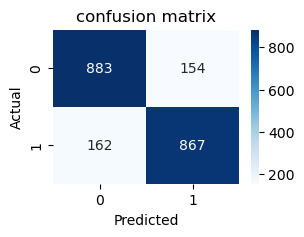

In [75]:
# To create a confusion matrix XGB Classifier

fig,ax = plt.subplots(figsize = (3,2))

xgbc = confusion_matrix(y_test, xgbc_pred)

# To visualize the confusion matrix
sns.heatmap(xgbc, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

##### Observations for Random Forest Classifier
From the observation above:
- TP - 867
- TN - 883
- FP - 154
- FN - 162

### 6. SVC

In [76]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("SVC")
print("Accuracy:", accuracy_score(y_test, svc_pred))
print("Precision:", precision_score(y_test, svc_pred))
print("Recall:", recall_score(y_test, svc_pred))
print("F1-score:", f1_score(y_test, svc_pred))
print("AUC-ROC:", roc_auc_score(y_test, svc_pred))

SVC
Accuracy: 0.7904162633107454
Precision: 0.7714025500910747
Recall: 0.8231292517006803
F1-score: 0.7964268923366243
AUC-ROC: 0.7905424464867915


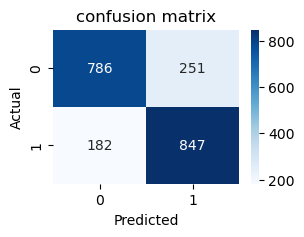

In [77]:
# To create a confusion matrix SVC

fig,ax = plt.subplots(figsize = (3,2))

svc = confusion_matrix(y_test, svc_pred)

# To visualize the confusion matrix
sns.heatmap(svc, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

##### Observations for SVC
From the observation above:
- TP - 847
- TN - 786
- FP - 251
- FN - 182

### 7. GaussianNB

In [78]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

print("GaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_pred))
print("Precision:", precision_score(y_test, gnb_pred))
print("Recall:", recall_score(y_test, gnb_pred))
print("F1-score:", f1_score(y_test, gnb_pred))
print("AUC-ROC:", roc_auc_score(y_test, gnb_pred))

GaussianNB
Accuracy: 0.7545982575024202
Precision: 0.7385740402193784
Recall: 0.7852283770651117
F1-score: 0.7611869995289684
AUC-ROC: 0.7547164064689107


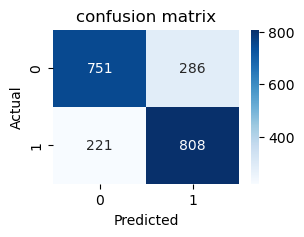

In [79]:
# To create a confusion matrix for GaussianNB

fig,ax = plt.subplots(figsize = (3,2))

gnb = confusion_matrix(y_test, gnb_pred)

# To visualize the confusion matrix
sns.heatmap(gnb, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

##### Observations for GaussianNB
From the observation above:
- TP - 808
- TN - 751
- FP - 286
- FN - 221

### 8. DecisionTreeClassifier

In [80]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

print("DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, dtc_pred))
print("Precision:", precision_score(y_test, dtc_pred))
print("Recall:", recall_score(y_test, dtc_pred))
print("F1-score:", f1_score(y_test, dtc_pred))
print("AUC-ROC:", roc_auc_score(y_test, dtc_pred))

DecisionTreeClassifier
Accuracy: 0.7947725072604066
Precision: 0.7878211227402474
Recall: 0.8046647230320699
F1-score: 0.7961538461538461
AUC-ROC: 0.7948106643125635


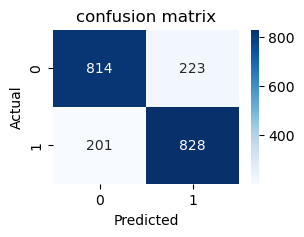

In [81]:
# To create a confusion matrix for DecisionTreeClassifier

fig,ax = plt.subplots(figsize = (3,2))

dtc = confusion_matrix(y_test, dtc_pred)

# To visualize the confusion matrix
sns.heatmap(dtc, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

##### Observations for GaussianNB
From the observation above:
- TP - 828
- TN - 814
- FP - 223
- FN - 201

### Combining the 8 machine learning Algorithms on the dataset

In [82]:
classifiers = [[SGDClassifier(), 'SGD Classifier'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [RandomForestClassifier(), 'Random Forest'],
               [LogisticRegression(), 'Logistic Regression'], 
               [XGBClassifier(), 'XGB Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(random_state = 42), "Decision tree"],              
              ]

In [83]:
classifiers

[[SGDClassifier(), 'SGD Classifier'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [RandomForestClassifier(), 'Random Forest'],
 [LogisticRegression(), 'Logistic Regression'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [SVC(), 'SVC']

In [84]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
f1_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + '%'])
    f1_list[model_name] = ([str(round(f_score*100,2)) + '%'])
    
    if model_name != classifiers[-1][1]:
       print('')

In [85]:
acc_list

{'SGD Classifier': ['75.75%'],
 'K-Nearest Neighbours': ['77.69%'],
 'Random Forest': ['84.8%'],
 'Logistic Regression': ['76.38%'],
 'XGB Classifier': ['84.7%'],
 'SVC': ['79.04%'],
 'Naive Bayes': ['75.46%'],
 'Decision tree': ['79.19%']}

In [86]:
# To convert the accuracy list(acc_list) in dictionary into a table
# Accuracy Score

print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,SGD Classifier,K-Nearest Neighbours,Random Forest,Logistic Regression,XGB Classifier,SVC,Naive Bayes,Decision tree
0,75.75%,77.69%,84.8%,76.38%,84.7%,79.04%,75.46%,79.19%


In [87]:
precision_list

{'SGD Classifier': ['72.72%'],
 'K-Nearest Neighbours': ['72.94%'],
 'Random Forest': ['84.81%'],
 'Logistic Regression': ['74.7%'],
 'XGB Classifier': ['84.92%'],
 'SVC': ['77.14%'],
 'Naive Bayes': ['73.86%'],
 'Decision tree': ['78.99%']}

In [88]:
# To convert the precision list(precision_list) in dictionary into a table
# Precision Score

print("Precision Score")
s1 = pd.DataFrame(precision_list)
s1.head()

Precision Score


,SGD Classifier,K-Nearest Neighbours,Random Forest,Logistic Regression,XGB Classifier,SVC,Naive Bayes,Decision tree
0,72.72%,72.94%,84.81%,74.7%,84.92%,77.14%,73.86%,78.99%


In [89]:
recall_list

{'SGD Classifier': ['82.12%'],
 'K-Nearest Neighbours': ['87.76%'],
 'Random Forest': ['84.65%'],
 'Logistic Regression': ['79.49%'],
 'XGB Classifier': ['84.26%'],
 'SVC': ['82.31%'],
 'Naive Bayes': ['78.52%'],
 'Decision tree': ['79.3%']}

In [90]:
# To convert the recall list(recall_list) in dictionary into a table
# Recall Score

print("Recall Score")
s1 = pd.DataFrame(recall_list)
s1.head()

Recall Score


,SGD Classifier,K-Nearest Neighbours,Random Forest,Logistic Regression,XGB Classifier,SVC,Naive Bayes,Decision tree
0,82.12%,87.76%,84.65%,79.49%,84.26%,82.31%,78.52%,79.3%


In [91]:
roc_list

{'SGD Classifier': ['75.77%'],
 'K-Nearest Neighbours': ['77.73%'],
 'Random Forest': ['84.8%'],
 'Logistic Regression': ['76.39%'],
 'XGB Classifier': ['84.7%'],
 'SVC': ['79.05%'],
 'Naive Bayes': ['75.47%'],
 'Decision tree': ['79.19%']}

In [92]:
# To convert the roc_auc list(roc_list) in dictionary into a table
# roc_list

print("Roc list")
s1 = pd.DataFrame(roc_list)
s1.head()

Roc list


,SGD Classifier,K-Nearest Neighbours,Random Forest,Logistic Regression,XGB Classifier,SVC,Naive Bayes,Decision tree
0,75.77%,77.73%,84.8%,76.39%,84.7%,79.05%,75.47%,79.19%


In [93]:
f1_list

{'SGD Classifier': ['77.13%'],
 'K-Nearest Neighbours': ['79.66%'],
 'Random Forest': ['84.73%'],
 'Logistic Regression': ['77.02%'],
 'XGB Classifier': ['84.59%'],
 'SVC': ['79.64%'],
 'Naive Bayes': ['76.12%'],
 'Decision tree': ['79.15%']}

In [94]:
# To convert the f1 list(f1_list) in dictionary into a table
# roc_list

print("F1 list")
s1 = pd.DataFrame(f1_list)
s1.head()

F1 list


,SGD Classifier,K-Nearest Neighbours,Random Forest,Logistic Regression,XGB Classifier,SVC,Naive Bayes,Decision tree
0,77.13%,79.66%,84.73%,77.02%,84.59%,79.64%,76.12%,79.15%


# <center><div style="font-family: Trebuchet MS; padding: 12px; line-height: 1;">Algorithm Results Table</div></center>


|Sr. No.|ML Algorithm|accuracy_score|precision_score|recall_score|roc_auc_score|f1_score|
|-|-|-|-|-|-|-|
|1|SGD Classifier|74.73%|69.63%|87.36%|77.5%|74.78%|
|2|K-Nearest Neighbours|77.68%|72.94%|87.75%|79.66%|77.72%|
|3|Random Forest|84.94%|84.45%|85.51%|84.98%|84.94%|
|4|Logistic Regression|76.37%|74.70%|79.49%|77.02%|76.39%|
|5|XGB Classifier|84.70%|84.91%|84.25%|84.58%|84.70%| 
|6|SVC|79.04%|77.14%|82.31%|79.64%|79.05%|
|7|Naive Bayes|75.45%|73.85%|78.52%|76.11%|75.47%|
|8|Decision tree|79.47%|78.78%|80.46%|79.61%|79.48%|


##### Insight
After several experimentation and careful examination of each model, the best performing model which is Random Forest Classifier was selected.

##### Recommendation
- Design and implement personalized retention initiatives. These strategies may include offering special incentives, enhancing customer service, or improving product offerings to address specific pain points.
- Incorporate customer feedback mechanisms to gather qualitative insights, which can be used to further refine predictive models and retention strategies.

##### Conclusion
The development of a customer churn prediction system is essential to improve the company's customer retention efforts. By leveraging machine learning and advanced analytics, ConnectTel can accurately identify customers at risk of churning and proactively implement targeted interventions. This approach will not only reduce churn but also enhance customer satisfaction, thereby ensuring long-term business sustainability and growth. This project highlights the importance of data-driven decision-making in addressing critical business challenges and optimizing customer retention strategies.

In [95]:
#pip install imbalanced-learn

In [96]:
#pip install --upgrade scikit-learn

In [97]:
#! pip install imbalanced-learn

In [98]:
#pip install scikit-learn

In [99]:
#pip install scikit-learn